## Distribution of Returns

In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2025-04-16 12:31:40,258 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-16 12:31:40,261 - src.data_loader - DEBUG - self.df_robinhood_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_rh_last.parquet (data_loader.py:59)
2025-04-16 12:31:40,262 - src.data_loader - DEBUG - self.df_wrds_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_wrds.parquet (data_loader.py:60)
2025-04-16 12:31:40,263 - src.data_loader - DEBUG - self.df_crsp_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_crsp_div.parquet (data_loader.py:61)
2025-04-16 12:31:40,264 - src.data_loader - DEBUG - self.df_merged_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_merged_drop.parquet (data_loader.py:62)
2025-04-16 12:31:40,265 - src.data_loader - DEBUG - load_merged:  True (data_loader.py:191)


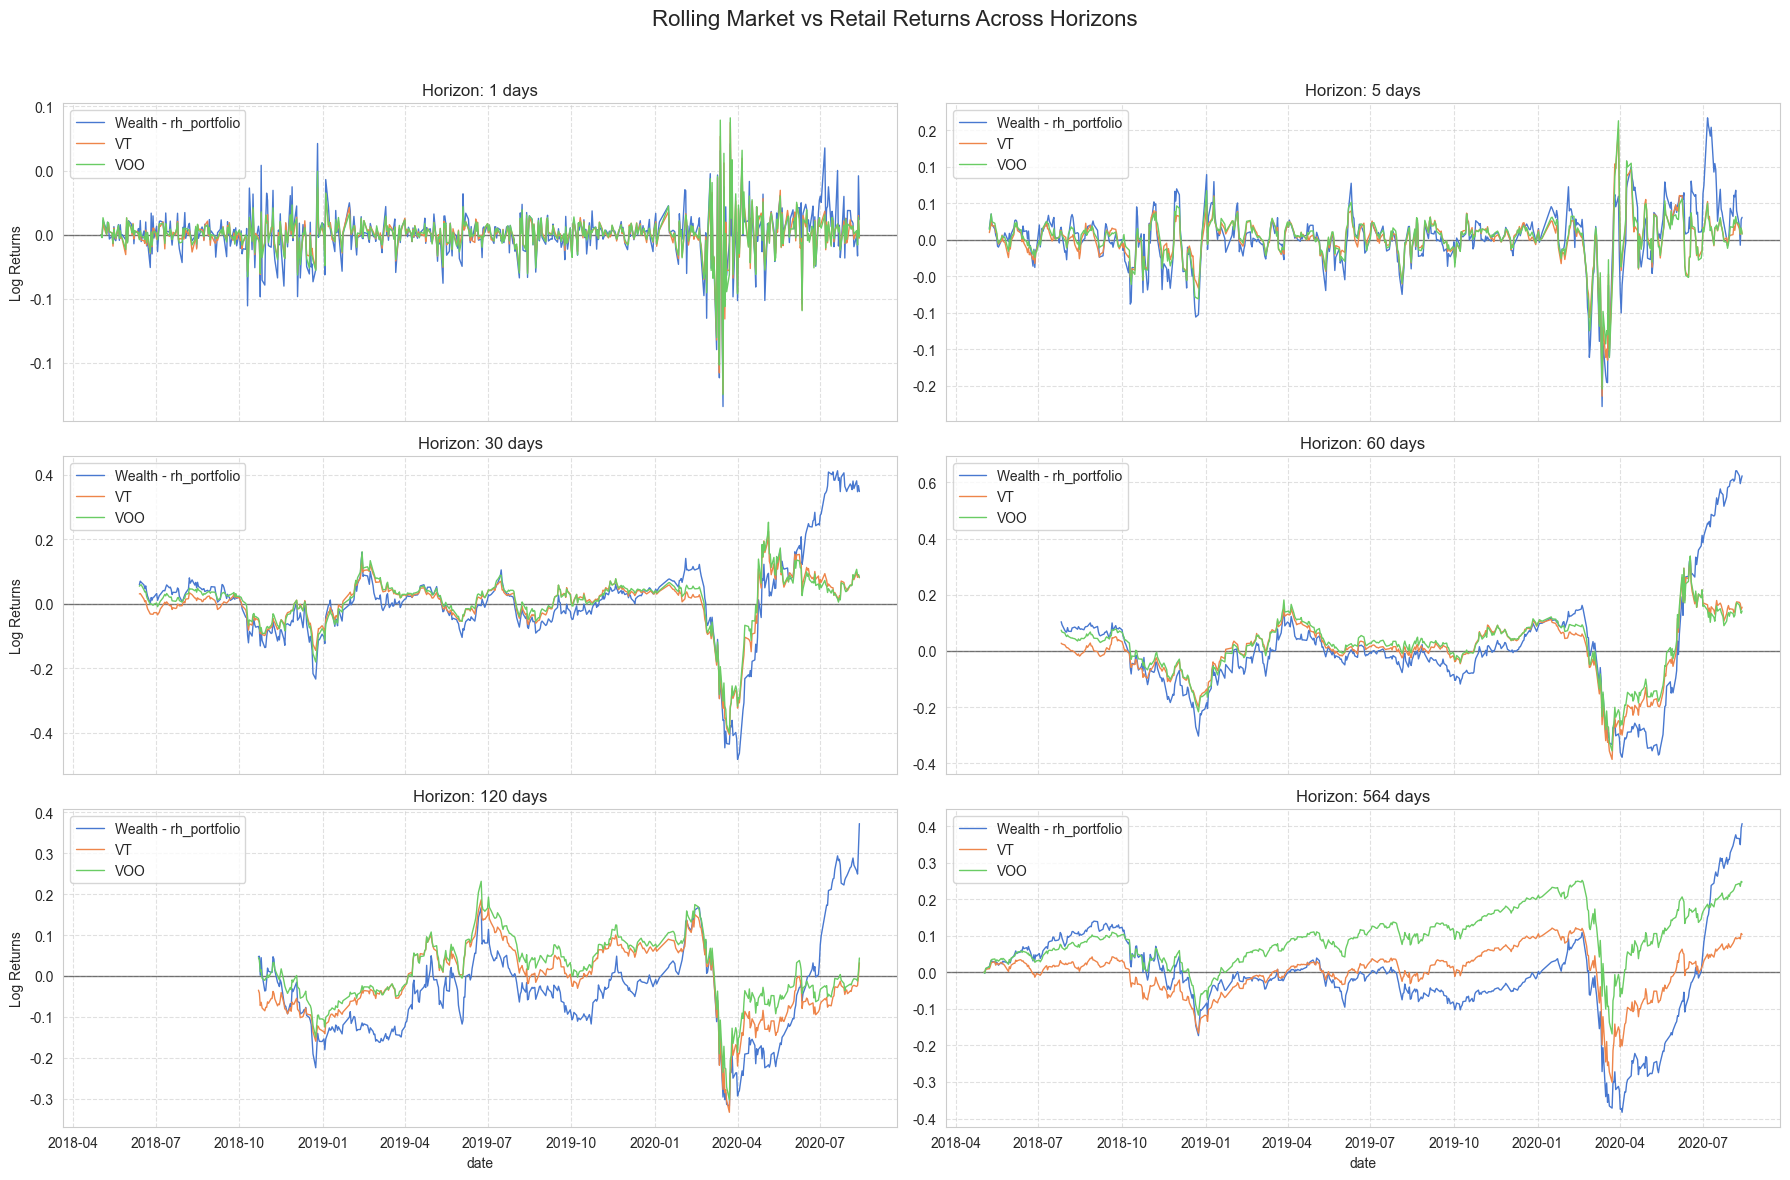

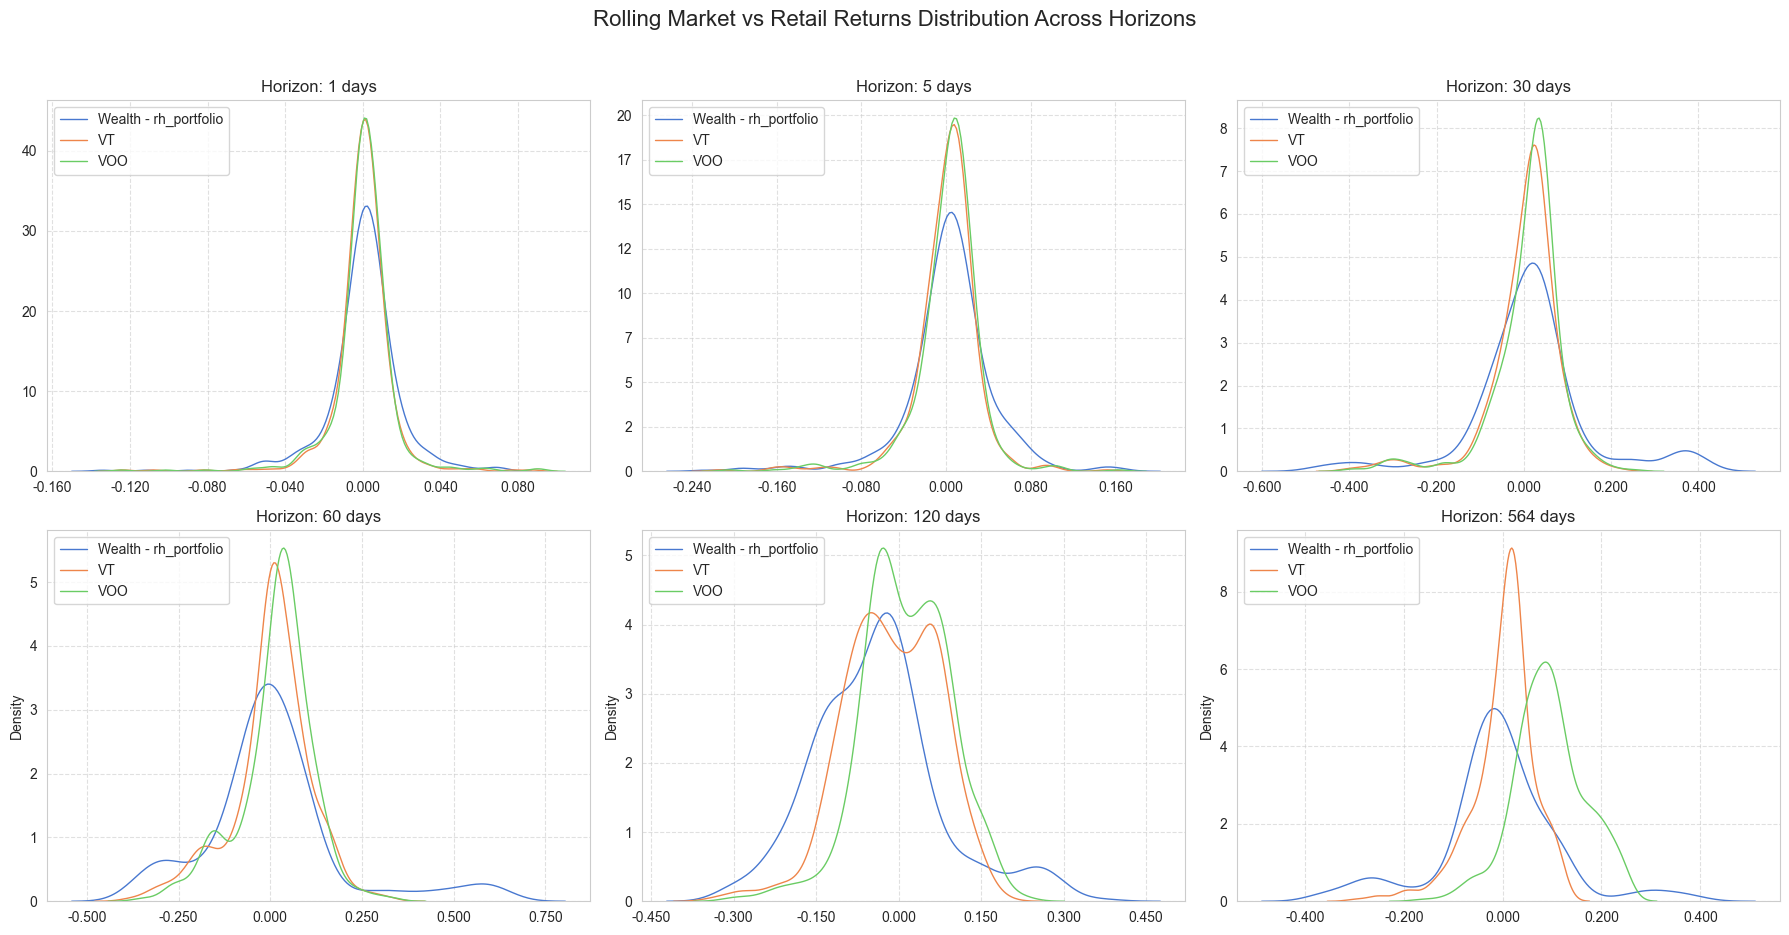

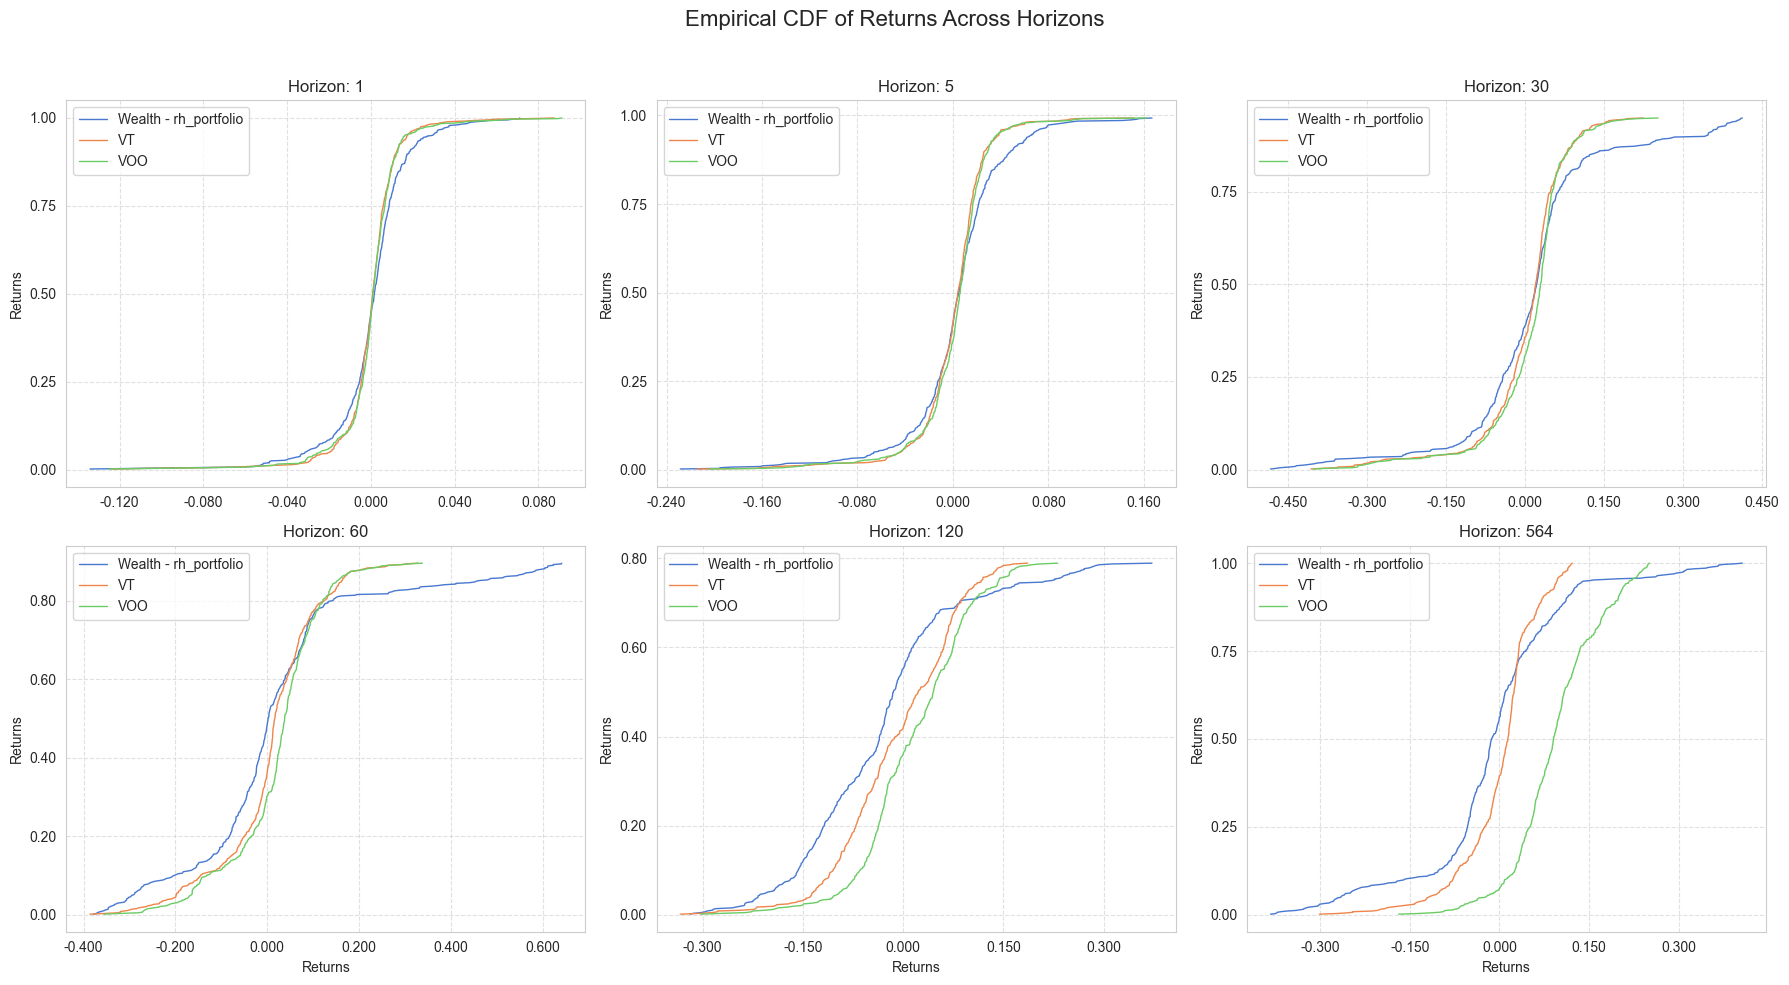

In [8]:
from src import Analyzer
from src.utils.params import ReturnParams

#return_params = {"horizons":[1, 5, 30, 60, 120], "start_date":"2019-01-01", "end_date":"2020-01-01", "cumulative":True, "append_start":False}
return_params = ReturnParams(
    horizons={1, 5, 30, 60, 120},  
    start_date=None,
    cumulative=True,
    append_start=False
)

an = Analyzer(compare_tickers=["VT", "VOO"], return_params=return_params, stocks_only=False, weights_method="stocks")

r_w, h_w = an.build_returns()

from src.visuals.plotter import Plotter, ReturnSeries

plotter = Plotter([
    ReturnSeries(label="Wealth", df=r_w, horizons=h_w)
])

plotter.plot_returns_timeseries()
plotter.plot_returns_kdes()
plotter.plot_returns_cdfs()

In [4]:
returns = an.build_returns()[0]
cols_to_keep = [col for col in returns.columns if col.endswith("return")]
returns = returns[cols_to_keep]
desc = returns.describe().T
desc["count"] = desc["count"].astype(int)
desc["positive returns"] = returns.gt(0).sum() / desc["count"]
#desc_bef.round(6)
desc

count      mean       std       min       25%  \
rh_portfolio_1_return      430  0.000115  0.013490 -0.050597 -0.005461   
VT_1_return                430  0.000198  0.008361 -0.031068 -0.003794   
VOO_1_return               430  0.000485  0.008928 -0.032828 -0.003066   
rh_portfolio_5_return      426  0.000259  0.026549 -0.105948 -0.013623   
VT_5_return                426  0.001031  0.018612 -0.066412 -0.010824   
VOO_5_return               426  0.002442  0.019790 -0.081061 -0.008308   
rh_portfolio_30_return     401 -0.002412  0.055168 -0.234788 -0.041433   
VT_30_return               401  0.005749  0.042546 -0.144917 -0.020502   
VOO_30_return              401  0.013029  0.045214 -0.180910 -0.011703   
rh_portfolio_60_return     371 -0.012211  0.076243 -0.305460 -0.057025   
VT_60_return               371  0.010207  0.059781 -0.199737 -0.014988   
VOO_60_return              371  0.023144  0.062119 -0.216585 -0.005072   
rh_portfolio_120_return    311 -0.048091  0.066510 -0.223381 -0.100718   
VT_120_return              311  0.010458  0.068833 -0.159522 -0.043950   
VOO_120_return             311  0.032986  0.066707 -0.149697 -0.023424   
rh_portfolio_430_return    430  0.001810  0.060701 -0.170420 -0.045256   
VT_430_return              430  0.007368  0.045975 -0.166474 -0.013745   
VOO_430_return             430  0.084082  0.058964 -0.117065  0.044986   

                              50%       75%       max  positive returns  
rh_portfolio_1_return    0.000809  0.007377  0.068808          0.537209  
VT_1_return              0.000716  0.004853  0.036545          0.546512  
VOO_1_return             0.000757  0.005096  0.049350          0.558140  
rh_portfolio_5_return    0.002922  0.014899  0.088194          0.570423  
VT_5_return              0.002804  0.013208  0.060003          0.565728  
VOO_5_return             0.004981  0.014449  0.067072          0.636150  
rh_portfolio_30_return   0.009412  0.038000  0.155356          0.548628  
VT_30_return             0.013801  0.032794  0.134874          0.605985  
VOO_30_return            0.023326  0.041188  0.161477          0.670823  
rh_portfolio_60_return  -0.006506  0.042028  0.148547          0.436658  
VT_60_return             0.011650  0.047872  0.154998          0.633423  
VOO_60_return            0.030436  0.060102  0.181531          0.714286  
rh_portfolio_120_return -0.037019 -0.005501  0.162873          0.228296  
VT_120_return            0.013403  0.064461  0.186378          0.598071  
VOO_120_return           0.040461  0.077808  0.231377          0.681672  
rh_portfolio_430_return -0.005744  0.033562  0.140801          0.448837  
VT_430_return            0.014630  0.029676  0.120887          0.623256  
VOO_430_return           0.084392  0.118022  0.232480          0.939535

In [5]:
levels = an.build_levels()
levels

rh_portfolio     VT        VOO
date                                      
2018-05-02     96.041674  73.62  241.78000
2018-05-03     95.826112  73.59  241.21001
2018-05-04     97.179437  74.22  244.41000
2018-05-07     97.955565  74.33  245.17000
2018-05-08     97.534681  74.34  245.16000
...                  ...    ...        ...
2020-08-07    138.001671  80.69  307.35999
2020-08-10    138.034713  80.91  308.34000
2020-08-11    135.827047  80.66  305.85001
2020-08-12    141.703779  81.87  310.04001
2020-08-13    144.099853  81.65  309.51001

[564 rows x 3 columns]

<Axes: xlabel='date'>

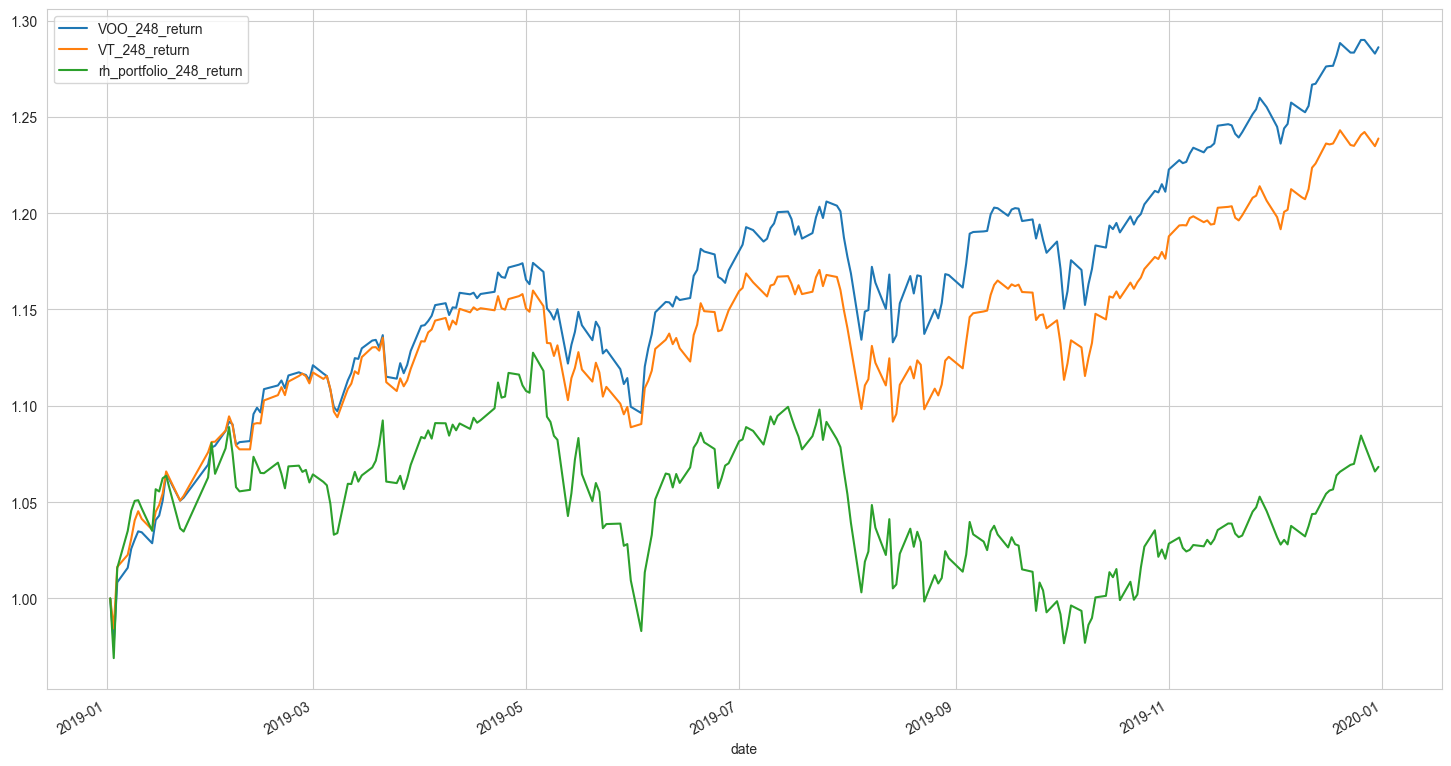

In [33]:
import numpy as np
exp = np.exp(returns)
exp[["VOO_248_return", "VT_248_return", "rh_portfolio_248_return"]].plot(kind="line", figsize=(18,10))

A possible issue is that Fedyk builds using only us stocks, explore difference in market contribution as $w_i\cdot R_t$

In [11]:
from src import DataLoader

dl = DataLoader()

df_merged = dl.merge_dfs()
df_merged= df_merged[(df_merged["date"]>"2019-01-01")*(df_merged["date"]<"2020-01-01")]


df_merged= df_merged[(df_merged["shrcd"]==11)]
df_merged["popularity"] = df_merged["holders"] / df_merged[["date", "holders"]].groupby("date")["holders"].transform("sum")

df_merged["rh_portfolio"] = df_merged["popularity"] * df_merged["prc_adj"]
df_merged = df_merged[["date", "rh_portfolio"]].groupby("date").sum()


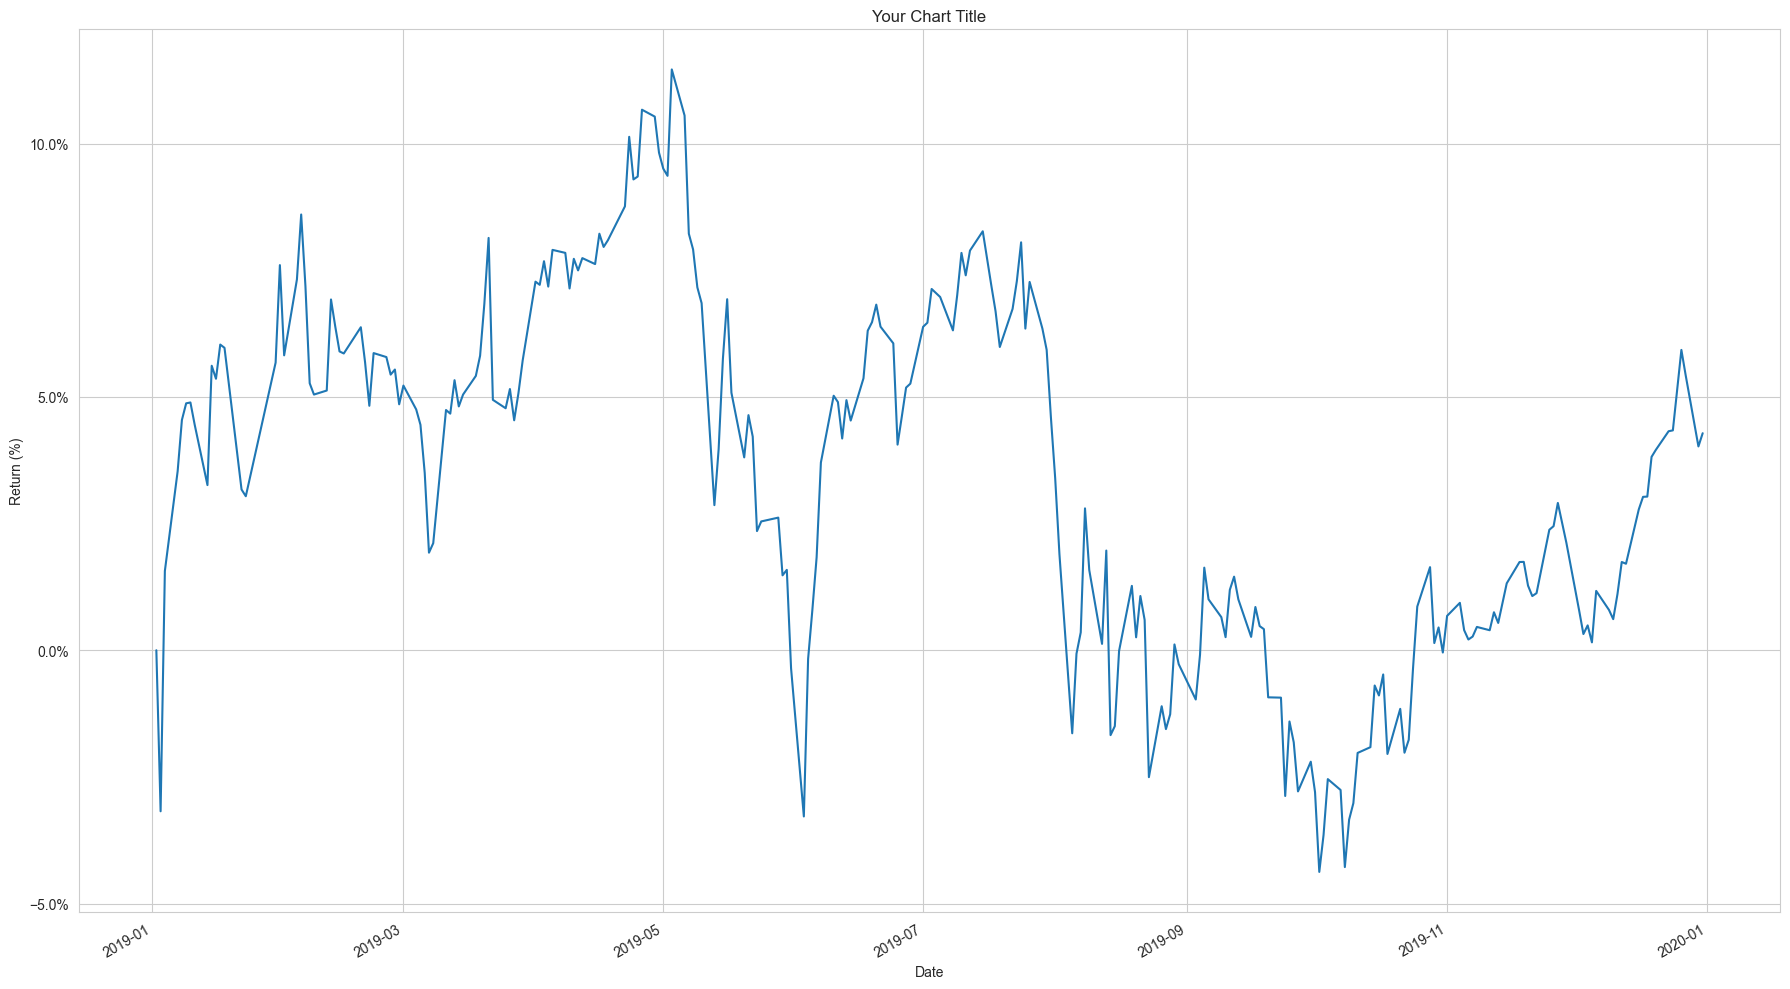

In [12]:
df_keep_plot = df_merged / df_merged.iloc[0] -1
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ax = df_keep_plot["rh_portfolio"].plot(kind="line", figsize=(18, 10))

ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # Assumes your values are in decimal (e.g., 0.05 for 5%)

plt.title("Your Chart Title")
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


rh_portfolio_x  rh_portfolio_y
ticker                                
A             4.167768        4.350377
AAL          36.923665       39.017893
AAME          0.020653        0.021473
AAN           0.691180        0.724711
AAOI          3.024248        3.116142
...                ...             ...
ZTR           0.249780        0.000000
ZTS           7.265466        7.609183
ZUMZ          0.486093        0.506437
ZUO           4.773452        4.963972
ZYNE          7.113742        7.426048

[5097 rows x 2 columns]

- qq Plot

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


# List of columns you want to plot
columns_to_plot = [col for col in returns.columns if col.startswith("rh")]  # Replace with your actual column names

# Set the number of rows and columns for subplots
n_cols = 2
n_cols = int(np.ceil(len(columns_to_plot) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_cols, n_cols, figsize=(5 * n_cols, 12))

# Flatten axes for easy indexing
axes = axes.flatten()

# Generate Q-Q plots
for i, column in enumerate(columns_to_plot):
    data = returns[column].dropna()
    stats.probplot(data, dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {column}")
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


NameError: name 'returns' is not defined

- Finding whether the means are statistically different

In [9]:
from scipy import stats

group1 = returns["rh_portfolio_430_return"].dropna()
group2 = returns["VOO_430_return"].dropna()


# Perform the t-test without assuming equal variances (Welch's t-test)
t_statistic_welch, p_value_welch = stats.ttest_ind(group1, group2, equal_var=False)

print(f"Welch's T-statistic: {t_statistic_welch}")
print(f"Welch's P-value: {p_value_welch}")


Welch's T-statistic: -20.159720383162487
Welch's P-value: 2.7952876327493916e-74


- Here i try to show the distribution for a window over time, to see how it progresses.

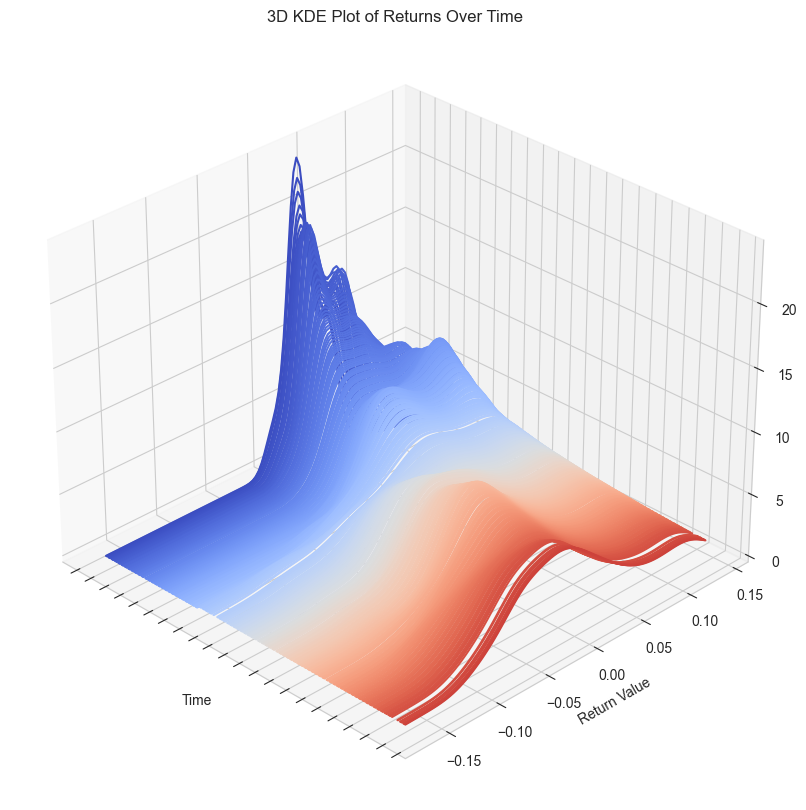

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt


ret = an.build_returns()[0]["rh_portfolio_430_return"]

# Apply Seaborn styling
sns.set_style("whitegrid")

# Create a 3D figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Choose the color palette
colors = sns.color_palette("coolwarm", n_colors=len(ret))

overall_min_return = ret.min()
overall_max_return = ret.max()
y_kde = np.linspace(overall_min_return, overall_max_return, 100)

# Iterate through each day and calculate the KDE
for i, d in enumerate(range(30, len(ret.index))):
    # Filter the series up to date d
    internal_ret = ret.head(d)

    # Calculate the KDE
    data_rolling = internal_ret.dropna()  # Handle potential NaNs
    kde = gaussian_kde(data_rolling)


    # Evaluate the KDE on the range of return values
    z_kde = kde(y_kde)

    # Get the time point for this KDE
    time_val_ordinal = internal_ret.index[-1].toordinal()

    # Create the 3D plot, swapping x and y
    ax.plot(np.repeat(time_val_ordinal, len(y_kde)), y_kde, z_kde, label=internal_ret.index[-1].strftime('%Y-%m'), color=colors[i], linewidth=1.5)

# Set labels
ax.set_xlabel("Time")
ax.set_ylabel("Return Value")
ax.set_zlabel("Density")
ax.set_title("3D KDE Plot of Returns Over Time")

# We need to explicitly set the x-axis ticks to be the ordinal values
# corresponding to your actual dates.
ordinal_dates = ret.index.map(pd.Timestamp.toordinal)
ax.set_xticks(ordinal_dates[::50])
ax.set_xticklabels([date.strftime('%Y-%m') for date in ret.index][::50])
ax.xaxis.set_major_locator(mdates.MonthLocator())   
#fig.autofmt_xdate()

# Add legend (optional, might get crowded)
# ax.legend()

# Rotate the view for better visualization
#ax.view_init(elev=0, azim=270)
ax.view_init(azim=-45)

# Show the plot
plt.show()

## Stochastic Dominance

### SSD

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Looking at Different Timeframes

- Here I'm trying to understand from what point onwards the market becomes SSD

In [15]:
from src import Analyzer

an = Analyzer(compare_tickers=["VOO", "VT"])
an.return_params = {"horizons":[1, 5, 30, 60, 120], "start_date":None, "end_date":"2020-02-03", "cumulative":True, "append_start":False}


2025-04-06 23:14:44,463 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)


In [16]:

ret = an.build_returns()[0]
ret.describe()

rh_portfolio         VOO          VT  rh_portfolio_1_return  \
count    430.000000  430.000000  430.000000             430.000000   
mean       0.000115    0.000485    0.000198               0.000115   
std        0.013490    0.008928    0.008361               0.013490   
min       -0.050597   -0.032828   -0.031068              -0.050597   
25%       -0.005461   -0.003066   -0.003794              -0.005461   
50%        0.000809    0.000757    0.000716               0.000809   
75%        0.007377    0.005096    0.004853               0.007377   
max        0.068808    0.049350    0.036545               0.068808   

       VOO_1_return  VT_1_return  rh_portfolio_5_return  VOO_5_return  \
count    430.000000   430.000000             426.000000    426.000000   
mean       0.000485     0.000198               0.000259      0.002442   
std        0.008928     0.008361               0.026549      0.019790   
min       -0.032828    -0.031068              -0.105948     -0.081061   
25%       -0.003066    -0.003794              -0.013623     -0.008308   
50%        0.000757     0.000716               0.002922      0.004981   
75%        0.005096     0.004853               0.014899      0.014449   
max        0.049350     0.036545               0.088194      0.067072   

       VT_5_return  rh_portfolio_30_return  ...  VT_30_return  \
count   426.000000              401.000000  ...    401.000000   
mean      0.001031               -0.002412  ...      0.005749   
std       0.018612                0.055168  ...      0.042546   
min      -0.066412               -0.234788  ...     -0.144917   
25%      -0.010824               -0.041433  ...     -0.020502   
50%       0.002804                0.009412  ...      0.013801   
75%       0.013208                0.038000  ...      0.032794   
max       0.060003                0.155356  ...      0.134874   

       rh_portfolio_60_return  VOO_60_return  VT_60_return  \
count              371.000000     371.000000    371.000000   
mean                -0.012211       0.023144      0.010207   
std                  0.076243       0.062119      0.059781   
min                 -0.305460      -0.216585     -0.199737   
25%                 -0.057025      -0.005072     -0.014988   
50%                 -0.006506       0.030436      0.011650   
75%                  0.042028       0.060102      0.047872   
max                  0.148547       0.181531      0.154998   

       rh_portfolio_120_return  VOO_120_return  VT_120_return  \
count               311.000000      311.000000     311.000000   
mean                 -0.048091        0.032986       0.010458   
std                   0.066510        0.066707       0.068833   
min                  -0.223381       -0.149697      -0.159522   
25%                  -0.100718       -0.023424      -0.043950   
50%                  -0.037019        0.040461       0.013403   
75%                  -0.005501        0.077808       0.064461   
max                   0.162873        0.231377       0.186378   

       rh_portfolio_430_return  VOO_430_return  VT_430_return  
count               430.000000      430.000000     430.000000  
mean                  0.001810        0.084082       0.007368  
std                   0.060701        0.058964       0.045975  
min                  -0.170420       -0.117065      -0.166474  
25%                  -0.045256        0.044986      -0.013745  
50%                  -0.005744        0.084392       0.014630  
75%                   0.033562        0.118022       0.029676  
max                   0.140801        0.232480       0.120887  

[8 rows x 21 columns]

In [17]:
cols_to_keep = [col for col in ret.columns if ("rh_portfolio_" in col or "VOO_" in col)]
voo_rh = ret[cols_to_keep]
voo_rh 

rh_portfolio_1_return  VOO_1_return  rh_portfolio_5_return  \
date                                                                     
2018-05-02               0.000000      0.000000                    NaN   
2018-05-03              -0.002247     -0.002360                    NaN   
2018-05-04               0.014024      0.013179                    NaN   
2018-05-07               0.007955      0.003105                    NaN   
2018-05-08              -0.004306     -0.000041               0.015426   
...                           ...           ...                    ...   
2020-01-28               0.013363      0.010775              -0.014694   
2020-01-29               0.004138     -0.000999              -0.011428   
2020-01-30               0.008871      0.003127              -0.006581   
2020-01-31              -0.006921     -0.018098              -0.002617   
2020-02-03               0.026350      0.007245               0.045801   

            VOO_5_return  rh_portfolio_30_return  VOO_30_return  \
date                                                              
2018-05-02           NaN                     NaN            NaN   
2018-05-03           NaN                     NaN            NaN   
2018-05-04           NaN                     NaN            NaN   
2018-05-07           NaN                     NaN            NaN   
2018-05-08      0.013883                     NaN            NaN   
...                  ...                     ...            ...   
2020-01-28     -0.013160                0.071454       0.055287   
2020-01-29     -0.014422                0.073192       0.047906   
2020-01-30     -0.012279                0.084372       0.049182   
2020-01-31     -0.021215                0.068162       0.022228   
2020-02-03      0.002050                0.098421       0.032520   

            rh_portfolio_60_return  VOO_60_return  rh_portfolio_120_return  \
date                                                                         
2018-05-02                     NaN            NaN                      NaN   
2018-05-03                     NaN            NaN                      NaN   
2018-05-04                     NaN            NaN                      NaN   
2018-05-07                     NaN            NaN                      NaN   
2018-05-08                     NaN            NaN                      NaN   
...                            ...            ...                      ...   
2020-01-28                0.090415       0.086331                 0.011342   
2020-01-29                0.103856       0.088858                 0.023800   
2020-01-30                0.110006       0.089039                 0.036433   
2020-01-31                0.089175       0.069309                 0.041291   
2020-02-03                0.104934       0.072394                 0.078768   

            VOO_120_return  rh_portfolio_430_return  VOO_430_return  
date                                                                 
2018-05-02             NaN                 0.000000        0.000000  
2018-05-03             NaN                -0.002247       -0.002360  
2018-05-04             NaN                 0.011777        0.010819  
2018-05-07             NaN                 0.019732        0.013924  
2018-05-08             NaN                 0.015426        0.013883  
...                    ...                      ...             ...  
2020-01-28        0.079893                 0.016805        0.217253  
2020-01-29        0.080698                 0.020943        0.216254  
2020-01-30        0.086248                 0.029813        0.219381  
2020-01-31        0.079547                 0.022893        0.201283  
2020-02-03        0.095213                 0.049242        0.208528  

[430 rows x 12 columns]

In [18]:
from tqdm import tqdm
import pandas as pd

df_ssd = pd.DataFrame()
df_ssd.index = voo_rh.index


for h in [1, 5, 30, 60, 120, 430]:
    # Find the columns of returns for that speficic horizon
    h_cols = [col for col in voo_rh if f"_{h}_" in col]
    # Filter the dataframe
    h_df = voo_rh[h_cols]
    h_df = h_df.dropna() # Avoids empty arrays

    out_single_h = {}
    for day in tqdm(range(2, len(h_df)+1)): # Doesnt make sense to compare when you have just 1 point
        # Take the first #day 
        one_day = h_df.head(day)
        # Perform test and store percentage of points
        pct = an.test_second_order_stochastic_dominance(col_a=f"VOO_{h}_return", col_b=f"rh_portfolio_{h}_return", df=one_day)[4]
        out_single_h[one_day.index[-1]] = pct

    # Rename to have a column with that name and merge on index (date)
    out_single_h_series = pd.Series(out_single_h, name=f"SSD_{h}")
    df_ssd = df_ssd.merge(out_single_h_series, how="left", left_index=True, right_index=True)


100%|██████████| 429/429 [00:00<00:00, 2335.76it/s]


<Axes: xlabel='date'>

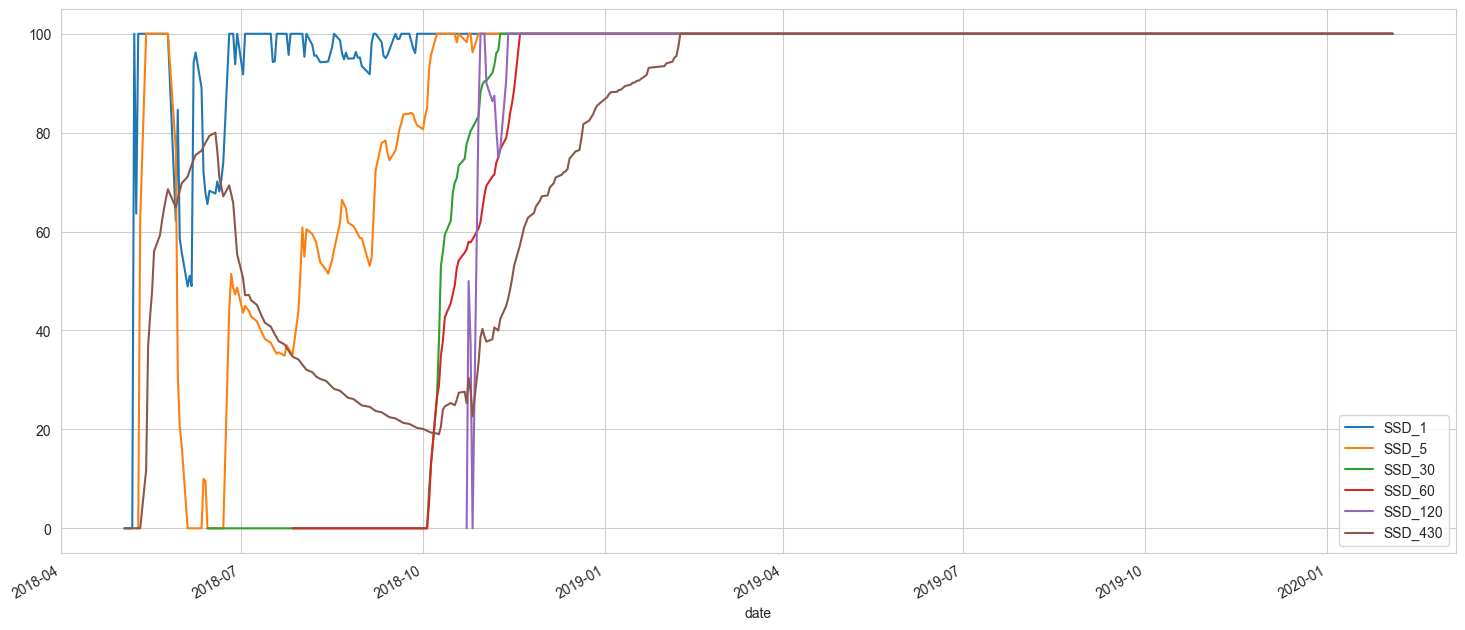

In [19]:
df_ssd.plot(kind="line", figsize=(18, 8))

- Here I plot SSD test at the last day of the dataset 

2025-04-06 23:15:18,370 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)


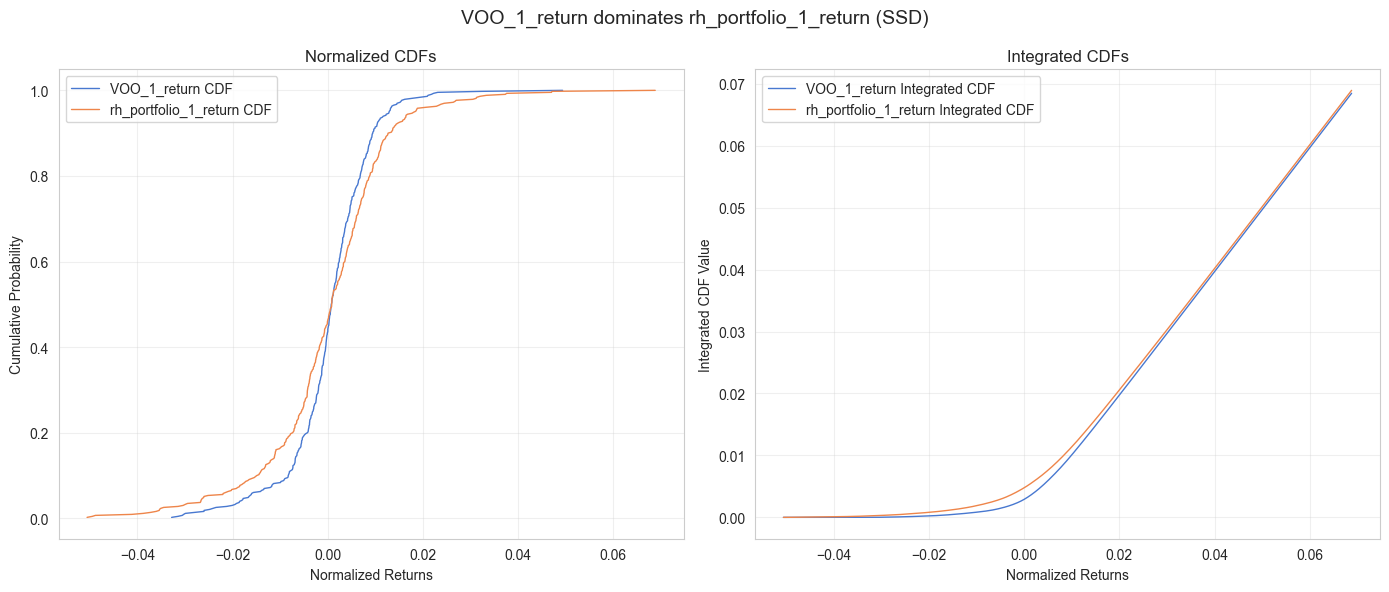

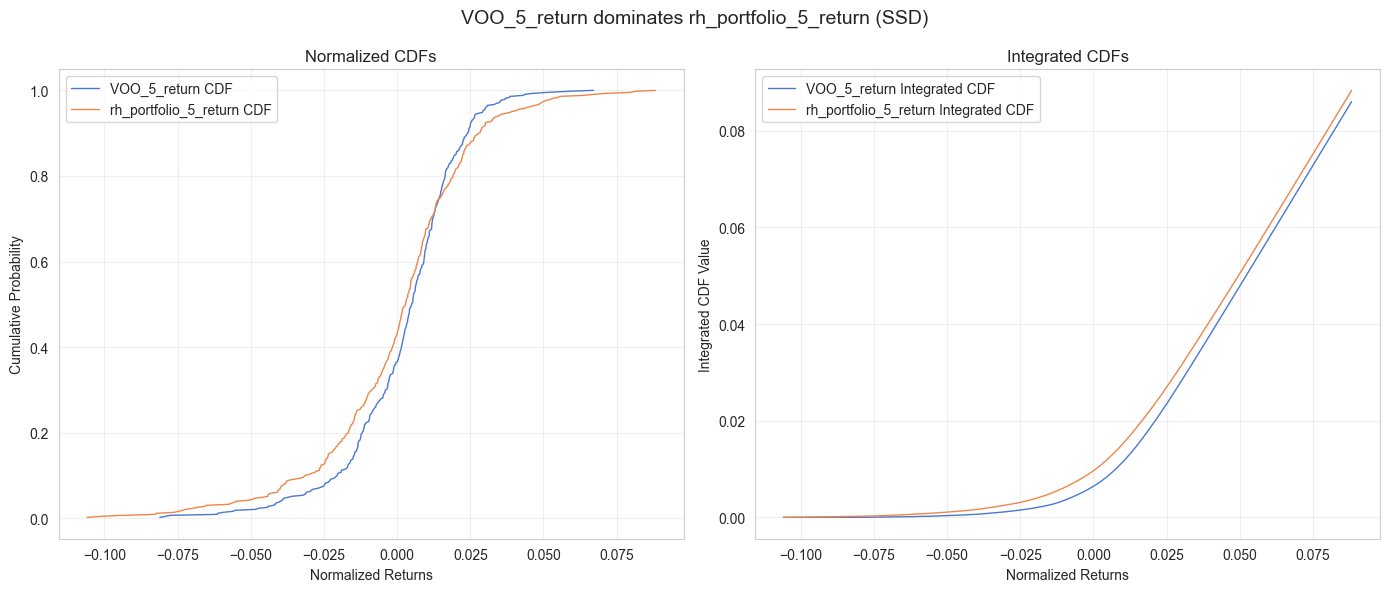

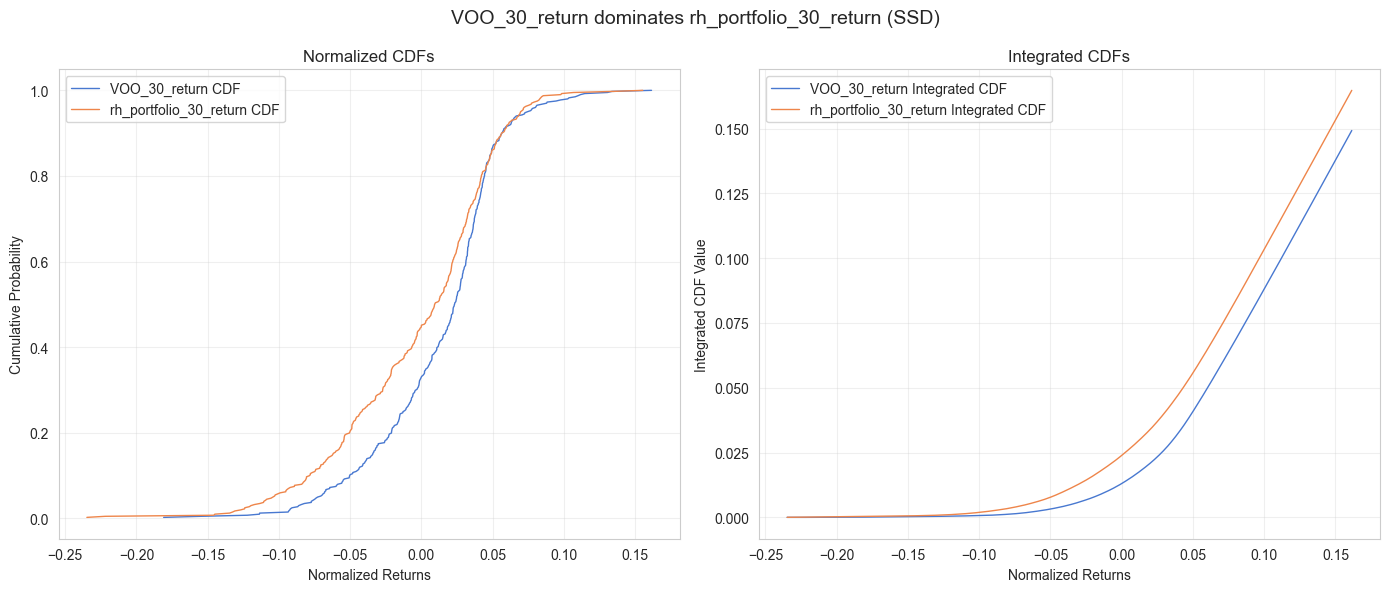

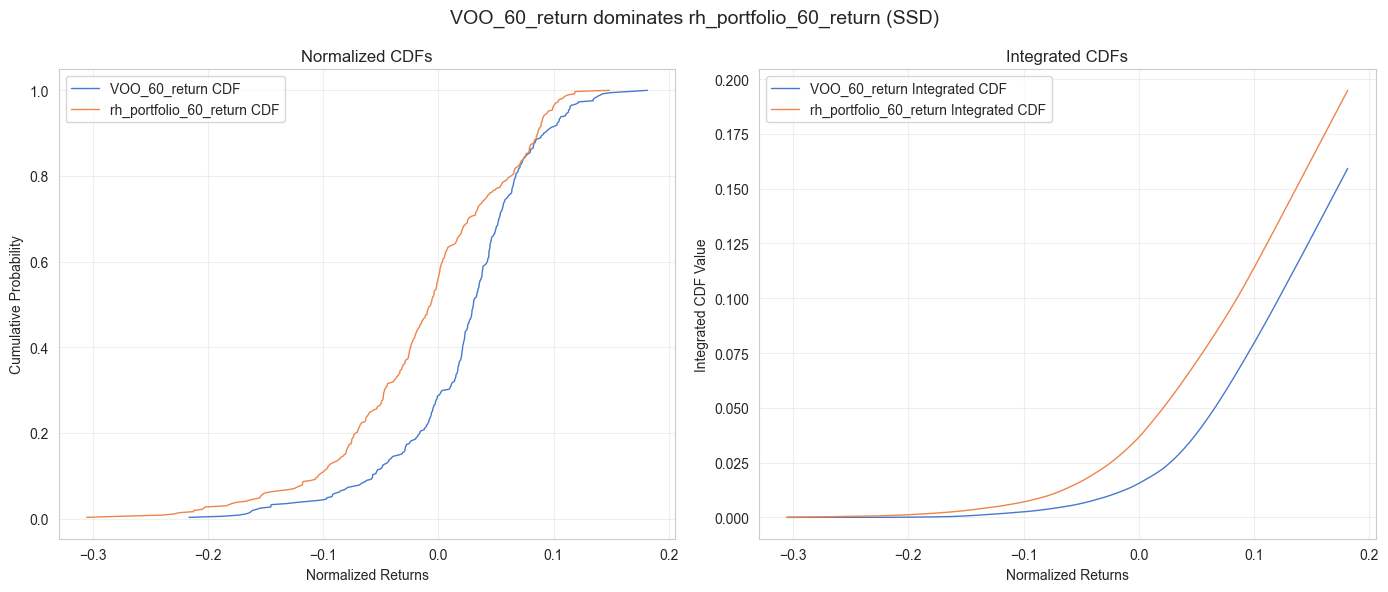

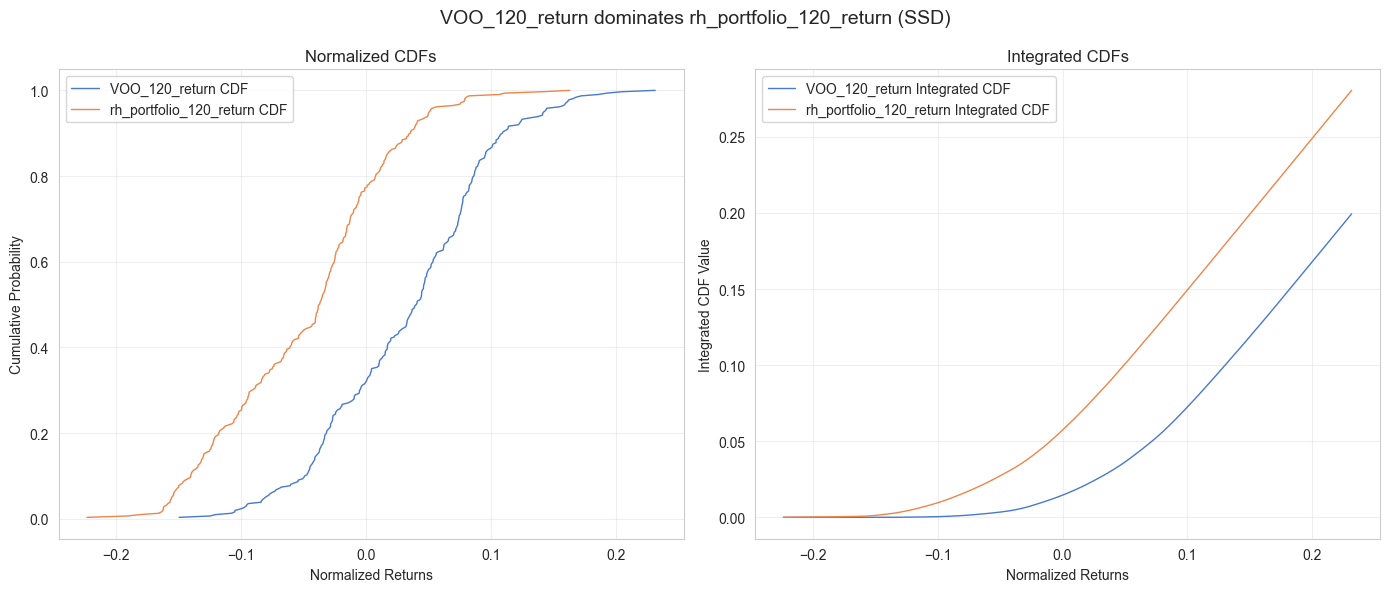

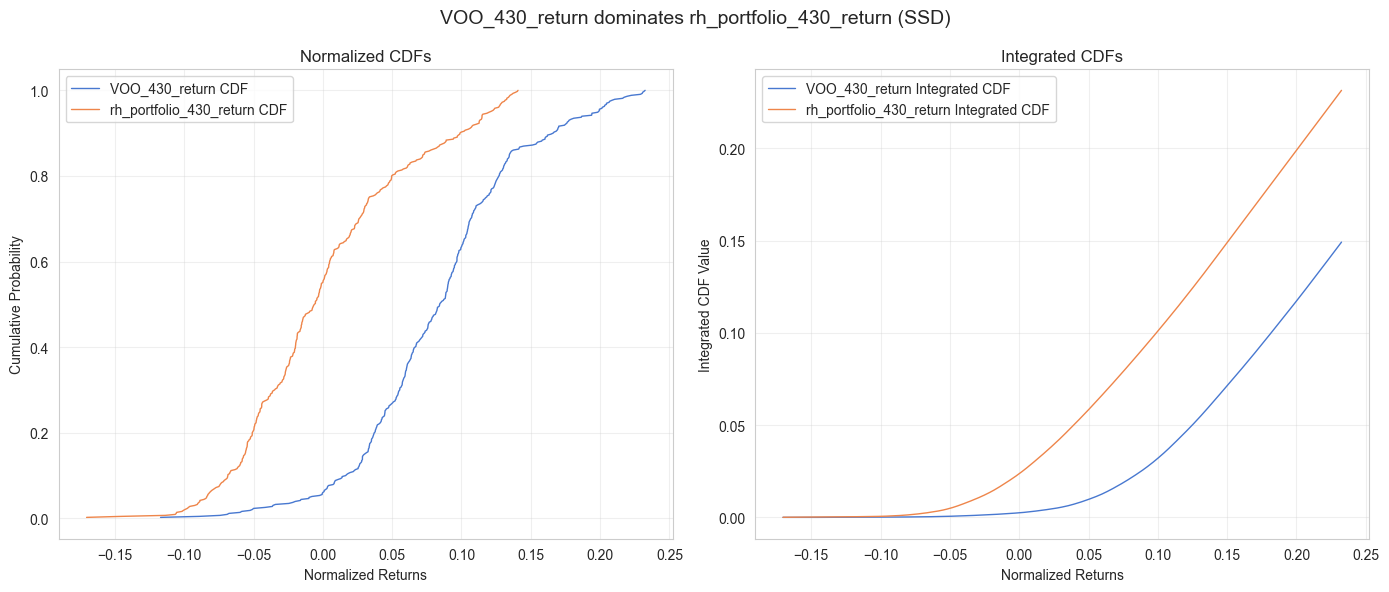

In [21]:
from src import Analyzer

an = Analyzer(return_params=return_params)



for hor in [1, 5, 30, 60, 120, 430]:
    an.plot_ssd_comparison(col_a=f"VOO_{hor}_return", col_b=f"rh_portfolio_{hor}_return")

## Check Welch Weights

Data handling:
- since i dont perform any ticker-based analyses then i dont need to care about different permnos etc

In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
from src import DataLoader

dl = DataLoader(handle_nans="keep")
df = dl.merge_dfs()
df["ticker"].nunique()

2025-04-16 17:01:44,484 - src.data_loader - DEBUG - self.df_robinhood_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_rh_last.parquet (data_loader.py:60)
2025-04-16 17:01:44,500 - src.data_loader - DEBUG - self.df_wrds_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_wrds.parquet (data_loader.py:61)
2025-04-16 17:01:44,502 - src.data_loader - DEBUG - self.df_crsp_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_crsp_div.parquet (data_loader.py:62)
2025-04-16 17:01:44,503 - src.data_loader - DEBUG - self.df_merged_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_merged_keep.parquet (data_loader.py:63)
2025-04-16 17:01:45,676 - src.data_loader - DEBUG - load_merged:  False (data_loader.py:193)


FileNotFoundError: [Errno 2] No such file or directory: '../data/tickers_to_exclude.json'

In [11]:
import pandas as pd


df_warh = pd.read_csv("D:\\Uni\\Bocconi\\Thesis\\Robinhood_data\\jf-datashare\\gabriel-cuevas\\data\\08_warh_d.csv")
df_warh

permno  yyyymmdd      warh
0         10026  20180601  0.000006
1         10026  20180604  0.000006
2         10026  20180605  0.000005
3         10026  20180606  0.000006
4         10026  20180607  0.000006
...         ...       ...       ...
1775351   93436  20200807  0.018246
1775352   93436  20200810  0.018264
1775353   93436  20200811  0.018408
1775354   93436  20200812  0.019078
1775355   93436  20200813  0.019060

[1775356 rows x 3 columns]

In [12]:
df_crsp_rh = pd.read_csv("D:\\Uni\\Bocconi\\Thesis\\Robinhood_data\\jf-datashare\\gabriel-cuevas\\data\\05_rhcrsp_data.csv")
df_crsp_rh

tic.yy  num.rh  sumnum.rh  permno  yyyymmdd  shrcd   tic dlret  \
0             1080531     900    5786540   87432  20180531     11     A   NaN   
1             1080601     885    5789977   87432  20180601     11     A   NaN   
2             1080604     875    5842230   87432  20180604     11     A   NaN   
3             1080605     873    5837089   87432  20180605     11     A   NaN   
4             1080606     834    5881187   87432  20180606     11     A   NaN   
...               ...     ...        ...     ...       ...    ...   ...   ...   
1778260  175084000807    3192   42033789   18418  20200807     11  ZYXI   NaN   
1778261  175084000810    3178   42255766   18418  20200810     11  ZYXI   NaN   
1778262  175084000811    3150   42111728   18418  20200811     11  ZYXI   NaN   
1778263  175084000812    3147   42077925   18418  20200812     11  ZYXI   NaN   
1778264  175084000813    3114   42134123   18418  20200813     11  ZYXI   NaN   

           prc      vol       ret  shrout    sprtrn         mcap  
0        61.92  2510357 -0.012283  319952 -0.006880  19811427.84  
1        62.78  2277946  0.013889  319952  0.010849  20086586.56  
2        63.38  1958048  0.009557  319952  0.004480  20278557.76  
3        63.52  1889520  0.002209  319952  0.000703  20323351.04  
4        65.19  3177630  0.026291  319952  0.008567  20857670.88  
...        ...      ...       ...     ...       ...          ...  
1778260  17.04   681368  0.013080   34706  0.000633    591390.24  
1778261  18.09   914091  0.061620   34706  0.002742    627831.54  
1778262  17.95   593295 -0.007739   34706 -0.007969    622972.70  
1778263  18.05   591079  0.005571   34706  0.013997    626443.30  
1778264  16.95   813611 -0.060942   34706 -0.002047    588266.70  

[1778265 rows x 14 columns]

In [13]:
df_warh[df_warh["permno"]==16347]

permno  yyyymmdd      warh
476136   16347  20181207  0.000000
476137   16347  20181210  0.000000
476138   16347  20181211  0.000000
476139   16347  20181212  0.000000
476140   16347  20181213  0.000000
...        ...       ...       ...
476544   16347  20200807  0.000192
476545   16347  20200810  0.000191
476546   16347  20200811  0.000194
476547   16347  20200812  0.000193
476548   16347  20200813  0.000193

[413 rows x 3 columns]

In [4]:
from src import DataLoader

dl = DataLoader(handle_nans="zero", load_merged=False)

df_compare = dl.merge_dfs()



2025-04-16 18:08:27,113 - src.data_loader - DEBUG - self.df_robinhood_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_rh_last.parquet (data_loader.py:60)
DEBUG:src.data_loader:self.df_robinhood_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_rh_last.parquet
2025-04-16 18:08:27,115 - src.data_loader - DEBUG - self.df_wrds_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_wrds.parquet (data_loader.py:61)
DEBUG:src.data_loader:self.df_wrds_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_wrds.parquet
2025-04-16 18:08:27,118 - src.data_loader - DEBUG - self.df_crsp_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_crsp_div.parquet (data_loader.py:62)
DEBUG:src.data_loader:self.df_crsp_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_crsp_div.parquet
2025-04-16 18:08:27,119 - src.data_loader - DEBUG - self.df_merged_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_merged_zero.parquet (data_loader.py:63)
DEBUG:src.data_loader:self.df_merged_path: D:\Uni\Bocconi\Thesis\Robinhood

In [5]:
df_compare.to_parquet("../data/df_merged_zero.parquet")
#df_compare.to_parquet("../data/df_merged_zero.parquet")

In [23]:
counts = df_compare.groupby(['date', 'ticker']).size()

# Find tickers that have any day with more than 1 row
bad_tickers = counts[counts > 1].reset_index()['ticker'].unique()
bad_tickers

[], Categories (7613, object): ['A', 'AA', 'AAAU', 'AACG', ..., 'ZVO', 'ZYME', 'ZYNE', 'ZYXI']

In [2]:
df_compare["date"].unique()

<DatetimeArray>
['2018-05-02 00:00:00', '2018-05-03 00:00:00', '2018-05-04 00:00:00',
 '2018-05-07 00:00:00', '2018-05-08 00:00:00', '2018-05-09 00:00:00',
 '2018-05-10 00:00:00', '2018-05-11 00:00:00', '2018-05-14 00:00:00',
 '2018-05-15 00:00:00',
 ...
 '2020-07-31 00:00:00', '2020-08-03 00:00:00', '2020-08-04 00:00:00',
 '2020-08-05 00:00:00', '2020-08-06 00:00:00', '2020-08-07 00:00:00',
 '2020-08-10 00:00:00', '2020-08-11 00:00:00', '2020-08-12 00:00:00',
 '2020-08-13 00:00:00']
Length: 564, dtype: datetime64[ns]

- Idea: drop values which have more trading days or more permnos

In [3]:
df_compare[["ticker", "permno", "shrcd", "date"]].groupby("ticker").agg({
    "permno":"nunique",
    "shrcd":"mean",
    "date":"count"
}).sort_values(by=["date","ticker"], ascending=[False, True])

permno  shrcd  date
ticker                     
AGM          2   11.0  1128
HNDL         1   73.0   577
CSWC         1   14.0   574
MXF          1   14.0   574
CWH          1   11.0   573
...        ...    ...   ...
BUFF         1   73.0     3
BUFR         1   73.0     2
DUAL         1   73.0     1
FSDC         1   11.0     1
KBNT         1   11.0     1

[8081 rows x 3 columns]

In [ ]:
df_compare[df_compare["ticker"]=="HNDL"]

date ticker  holders  permno  shrcd   divamt      prc      vol  \
1678873 2018-05-02   HNDL      0.0   17264   73.0  0.00000  23.8750     18.0   
1678874 2018-05-03   HNDL      0.0   17264   73.0  0.00000  23.8392   5310.0   
1678875 2018-05-04   HNDL      0.0   17264   73.0  0.00000  23.8626   9216.0   
1678876 2018-05-07   HNDL      0.0   17264   73.0  0.00000  23.9866   5001.0   
1678877 2018-05-08   HNDL      0.0   17264   73.0  0.00000  24.7100   1600.0   
...            ...    ...      ...     ...    ...      ...      ...      ...   
1679445 2020-08-10   HNDL    184.0   17264   73.0  0.00000  25.1175  68217.0   
1679446 2020-08-11   HNDL    184.0   17264   73.0  0.00000  25.0000  37711.0   
1679447 2020-08-12   HNDL    186.0   17264   73.0  0.00000  25.0200  53059.0   
1679448 2020-08-13   HNDL    184.0   17264   73.0  0.11050  24.9215  24982.0   
1679449 2020-08-13   HNDL    184.0   17264   73.0  0.03463  24.9215  24982.0   

              ret  shrout  ...  prc_adj_div  log_returns          mc  \
1678873 -0.002715   150.0  ...     23.87500    -0.002719   3581250.0   
1678874 -0.001500   150.0  ...     23.83920    -0.001501   3575880.0   
1678875  0.000982   150.0  ...     23.86260     0.000982   3579390.0   
1678876  0.005196   150.0  ...     23.98660     0.005183   3597990.0   
1678877  0.030158   150.0  ...     24.71000     0.029712   3706500.0   
...           ...     ...  ...          ...          ...         ...   
1679445  0.001084  1800.0  ...     28.87221     0.001083  45211500.0   
1679446 -0.004678  1800.0  ...     28.75471    -0.004689  45000000.0   
1679447  0.000800  1850.0  ...     28.77471     0.000800  46287000.0   
1679448  0.001864  1850.0  ...     28.78671     0.001862  46104775.0   
1679449  0.001864  1850.0  ...     28.82134     0.001862  46104775.0   

         market_weight  holders_change_pct  holders_change_diff  \
1678873   1.039861e-07                 NaN                  NaN   
1678874   1.040377e-07                 NaN                  0.0   
1678875   1.028889e-07                 NaN                  0.0   
1678876   1.029772e-07                 NaN                  0.0   
1678877   1.060329e-07                 NaN                  0.0   
...                ...                 ...                  ...   
1679445   1.029342e-06           -0.010811                 -2.0   
1679446   1.032568e-06            0.000000                  0.0   
1679447   1.048245e-06            0.010811                  2.0   
1679448   1.045040e-06           -0.010811                 -2.0   
1679449   1.045040e-06            0.000000                  0.0   

         total_holders  popularity  total_holders_change_pct  \
1678873      5527711.0    0.000000                       NaN   
1678874      5549883.0    0.000000                  0.004011   
1678875      5528123.0    0.000000                 -0.003921   
1678876      5512829.0    0.000000                 -0.002767   
1678877      5520378.0    0.000000                  0.001369   
...                ...         ...                       ...   
1679445     41227651.0    0.000004                  0.005215   
1679446     41088382.0    0.000004                 -0.003378   
1679447     41055891.0    0.000005                 -0.000791   
1679448     41103400.0    0.000004                  0.001157   
1679449     41103400.0    0.000004                  0.001157   

         total_holders_change_diff  
1678873                        NaN  
1678874                    22172.0  
1678875                   -21760.0  
1678876                   -15294.0  
1678877                     7549.0  
...                            ...  
1679445                   213902.0  
1679446                  -139269.0  
1679447                   -32491.0  
1679448                    47509.0  
1679449                    47509.0  

[577 rows x 25 columns]

In [ ]:
dl.df_crsp["ticker"].nunique()

8081

In [16]:
dl.df_crsp[dl.df_crsp["ticker"]=="SQM"]

permno       date  shrcd ticker   divamt    prc        vol       ret  \
2711290   79663 2018-05-02   31.0    SQM  0.00000  54.51  1126561.0 -0.010528   
2711291   79663 2018-05-03   31.0    SQM  0.36195  53.85   573427.0  0.001867   
2711292   79663 2018-05-03   31.0    SQM  0.39981  53.85   573427.0  0.001867   
2711293   79663 2018-05-04   31.0    SQM  0.00000  54.15   559795.0  0.005571   
2711294   79663 2018-05-07   31.0    SQM  0.00000  53.30   741774.0 -0.015697   
...         ...        ...    ...    ...      ...    ...        ...       ...   
2711862   79663 2020-08-07   31.0    SQM  0.00000  31.29   344144.0 -0.007926   
2711863   79663 2020-08-10   31.0    SQM  0.00000  31.53   661918.0  0.007670   
2711864   79663 2020-08-11   31.0    SQM  0.00000  32.30  1015024.0  0.024421   
2711865   79663 2020-08-12   31.0    SQM  0.00000  32.78   732563.0  0.014861   
2711866   79663 2020-08-13   31.0    SQM  0.00000  32.06   776710.0 -0.021965   

          shrout  cfacshr_adj  cfacpr_adj  prc_adj  shrout_adj  div_cum  \
2711290  50785.0          1.0         1.0    54.51  50785000.0  0.00000   
2711291  50785.0          1.0         1.0    53.85  50785000.0  0.36195   
2711292  50785.0          1.0         1.0    53.85  50785000.0  0.76176   
2711293  50785.0          1.0         1.0    54.15  50785000.0  0.76176   
2711294  50785.0          1.0         1.0    53.30  50785000.0  0.76176   
...          ...          ...         ...      ...         ...      ...   
2711862  50785.0          1.0         1.0    31.29  50785000.0  3.66233   
2711863  50785.0          1.0         1.0    31.53  50785000.0  3.66233   
2711864  50785.0          1.0         1.0    32.30  50785000.0  3.66233   
2711865  50785.0          1.0         1.0    32.78  50785000.0  3.66233   
2711866  50785.0          1.0         1.0    32.06  50785000.0  3.66233   

         prc_adj_div  
2711290     54.51000  
2711291     54.21195  
2711292     54.61176  
2711293     54.91176  
2711294     54.06176  
...              ...  
2711862     34.95233  
2711863     35.19233  
2711864     35.96233  
2711865     36.44233  
2711866     35.72233  

[577 rows x 15 columns]

In [17]:
df_compare[df_compare["ticker"]=="SQM"]["date"].value_counts().sort_values()

date
2020-08-04    1
2018-05-14    1
2018-05-15    1
2018-05-16    1
2018-05-17    1
             ..
2020-07-29    1
2020-07-30    1
2020-07-31    1
2020-08-03    1
2018-05-03    2
Name: count, Length: 564, dtype: int64

In [13]:
tickers_with_nans = dl.df_rh.isna().any(axis=0).index[dl.df_rh.isna().any(axis=0).values]
tickers_with_nans = tickers_with_nans.to_list()
len(tickers_with_nans)


2876

In [27]:
series = dl.df_rh["ACB"]
notna = series.notna()

# Find first and last valid index
first_valid = notna.idxmax()
last_valid = notna[::-1].idxmax()
# Slice between the first and last valid index
internal = series.loc[first_valid:last_valid]
sum(internal.isna())

33

In [ ]:
import pandas as pd
import numpy as np

def has_internal_nans(series):
    """Check if a time series has NaNs not at the beginning or end."""
    notna = series.notna()
    # Only consider if there’s at least one non-NaN (otherwise meaningless)
    if not notna.any():
        return False
    # Find first and last valid index
    first_valid = notna.idxmax()
    last_valid = notna[::-1].idxmax()
    # Slice between the first and last valid index
    internal = series.loc[first_valid:last_valid]
    return internal.isna().any()

# Assuming your DataFrame is dl.df_rh with a MultiIndex (date, ticker)
# and a column called 'num_investors' (or similar)


# Identify tickers with internal (non-edge) NaNs
tickers_with_holes = [col for col in dl.df_rh.columns if has_internal_nans(dl.df_rh[col])]

print(f"{len(tickers_with_holes)} tickers have internal NaNs (non-leading/trailing).")
dl.df_rh[tickers_with_holes]


A 0
AA 0
AAAU 0
AACG 0
AADR 0
AAL 0
AAMC 0
AAME 0
AAN 0
AAOI 0
AAON 0
AAP 0
AAPL 0
AAT 0
AAU 0
AAWW 0
AAXJ 0
AAXN 0
AB 0
ABAX 126
ABB 0
ABBV 0
ABC 0
ABCB 0
ABCD 0
ABDC 1
ABEO 0
ABEQ 0
ABEV 0
ABG 0
ABIO 0
ABM 0
ABMD 0
ABR 0
ABT 0
ABTX 0
ABUS 0
AC 0
ACA 0
ACAD 0
ACAM 0
ACB 33
ACBI 0
ACC 0
ACCD 0
ACCO 0
ACEL 0
ACER 0
ACES 0
ACGL 20
ACH 0
ACHC 0
ACHN 0
ACHV 0
ACI 0
ACIA 0
ACIO 0
ACIU 0
ACIW 0
ACLS 0
ACM 0
ACMR 0
ACN 0
ACNB 0
ACOR 0
ACP 0
ACRE 0
ACRS 0
ACRX 0
ACSG 0
ACSI 0
ACST 0
ACT 0
ACTG 0
ACTT 0
ACU 0
ACV 0
ACWF 0
ACWI 0
ACWV 0
ACWX 0
ACY 0
ADAP 0
ADBE 0
ADC 0
ADCT 0
ADES 0
ADI 0
ADIL 0
ADM 0
ADMA 0
ADME 0
ADMP 0
ADMS 0
ADNT 0
ADP 0
ADPT 0
ADRA 12
ADRD 11
ADRE 0
ADRO 0
ADRU 12
ADS 0
ADSK 0
ADSW 0
ADT 0
ADTN 0
ADTX 0
ADUS 0
ADVM 0
ADX 0
ADXN 0
ADXS 0
AE 0
AEE 0
AEF 0
AEGN 0
AEHR 0
AEIS 0
AEL 0
AEM 0
AEMD 16
AEO 0
AEP 0
AER 0
AERI 0
AES 0
AESE 0
AESR 0
AEY 0
AEYE 0
AEZS 0
AFB 0
AFG 0
AFH 0
AFI 0
AFIB 0
AFIF 0
AFIN 0
AFK 0
AFL 0
AFLG 0
AFMC 0
AFMD 0
AFSM 0
AFT 0
AFTY 0
AFYA 0
AG 0
AGBA 0
A

ABAX   ABDC       ACB   ACGL  ADRA  ADRD  ADRU    AEMD    AGC  \
timestamp                                                                   
2018-05-02  37.0  780.0       NaN   28.0  45.0   NaN  23.0     NaN  454.0   
2018-05-03  37.0  786.0       NaN   28.0  43.0   NaN  23.0     NaN  458.0   
2018-05-04  36.0  790.0       NaN   28.0  43.0   NaN  23.0     NaN  459.0   
2018-05-05  36.0  790.0       NaN   28.0  43.0   NaN  23.0     NaN  459.0   
2018-05-06  36.0  790.0       NaN   28.0  43.0   NaN  23.0     NaN  459.0   
...          ...    ...       ...    ...   ...   ...   ...     ...    ...   
2020-08-09   0.0    NaN  434675.0  234.0   NaN   NaN   NaN  2878.0    0.0   
2020-08-10   0.0    NaN  433174.0  232.0   NaN   NaN   NaN  2875.0    0.0   
2020-08-11   0.0    NaN  431886.0  229.0   NaN   NaN   NaN  2880.0    0.0   
2020-08-12   0.0    NaN  431125.0  229.0   NaN   NaN   NaN  2892.0    0.0   
2020-08-13   0.0    NaN  430303.0  226.0   NaN   NaN   NaN  2874.0    0.0   

            AGGE  ...    XPLR   XPP  XRLV    XRM  XSVM   XTH  YAYO  YESR  \
timestamp         ...                                                      
2018-05-02   4.0  ...  1989.0  40.0  32.0  274.0  33.0  29.0   NaN   7.0   
2018-05-03   3.0  ...  1968.0  41.0  32.0  272.0  34.0  28.0   NaN   7.0   
2018-05-04   3.0  ...  1948.0  40.0  32.0  272.0  33.0  30.0   NaN   7.0   
2018-05-05   3.0  ...  1948.0  40.0  32.0  272.0  33.0  30.0   NaN   7.0   
2018-05-06   3.0  ...  1948.0  40.0  32.0  272.0  33.0  30.0   NaN   7.0   
...          ...  ...     ...   ...   ...    ...   ...   ...   ...   ...   
2020-08-09   NaN  ...     0.0  45.0  38.0    0.0  33.0   NaN   NaN   0.0   
2020-08-10   NaN  ...     0.0  45.0  37.0    0.0  33.0   NaN   NaN   0.0   
2020-08-11   NaN  ...     0.0  45.0  37.0    0.0  33.0   NaN   NaN   0.0   
2020-08-12   NaN  ...     0.0  45.0  37.0    0.0  33.0   NaN   NaN   0.0   
2020-08-13   NaN  ...     0.0  44.0  37.0    0.0  33.0   NaN   NaN   0.0   

            ZBIO   ZCMD  
timestamp                
2018-05-02  44.0    NaN  
2018-05-03  40.0    NaN  
2018-05-04  39.0    NaN  
2018-05-05  39.0    NaN  
2018-05-06  39.0    NaN  
...          ...    ...  
2020-08-09   NaN  460.0  
2020-08-10   NaN  437.0  
2020-08-11   NaN  424.0  
2020-08-12   NaN  410.0  
2020-08-13   NaN  397.0  

[818 rows x 377 columns]

In [30]:
for tick in tickers_with_holes:
    has_internal_nans(dl.df_rh[tick])

ABAX 126
ABDC 1
ACB 33
ACGL 20
ADRA 12
ADRD 11
ADRU 12
AEMD 16
AGC 101
AGGE 5
AGND 11
AHT 2
ANDV 66
ARGO 13
ATTU 219
AVHI 64
AVNT 1
AXJL 11
BEN 2
BEP 1
BHAC 35
BKSC 3
BSCI 1
BSCK 1
BSCM 1
BSCN 1
BSJI 1
BSJK 1
BSJL 1
BSJM 1
BSJN 1
BSJP 1
BUFF 13
BUYN 5
BWINA 126
BWINB 126
CA 31
CASH 2
CCA 91
CHFN 93
CNDF 112
CNSF 112
CNSP 23
COBZ 66
CORV 1
COTV 101
CPL 16
CPLA 126
CROP 5
CSD 1
CVG 62
CWAY 59
CYOU 2
CYS 126
CZA 1
DBP 1
DBS 1
DERM 3
DGL 1
DMS 2
DNO 90
DOGS 9
DPK 4
DUO 25
DVOP 1
DWAQ 8
DWAS 1
DWIN 7
DWTR 8
DYB 3
DYLS 11
EACQ 30
EASI 7
EBIZ 10
EDGW 34
EDUT 2
EEB 8
EELV 1
EGC 49
EGIF 6
EIC 118
EIRL 2
ELON 83
EMCG 11
EPRF 9
EQAL 1
ERGF 112
ESGA 2
ESGF 7
ESGL 7
ESGW 2
EUFL 4
EUMF 11
EVHC 56
EWEM 8
EWMC 1
EWRE 1
EWSC 1
FBNK 65
FFKT 107
FINU 3
FINZ 3
FLIO 3
FLUD 2
FMI 127
FNCF 112
FRN 7
FTEO 158
FTFT 34
FXCH 93
FXS 94
FXSG 95
GASL 4
GEVO 1
GGP 100
GHII 7
GLBY 11
GLF 20
GOCO 2
GPT 57
GTO 1
GULF 11
HACV 112
HACW 112
HAHA 72
HAO 7
HCFT 1
HCR 1
HCRF 112
HECO 3
HEFV 112
HEMV 112
HEUS 112
HFXE 5
HFXJ 

In [18]:
dl.df_rh[["SMCI"]]

SMCI
timestamp              
2018-05-02   666.000000
2018-05-03   665.631579
2018-05-04   657.583333
2018-05-05   650.000000
2018-05-06   650.000000
...                 ...
2020-08-09   813.000000
2020-08-10   815.416667
2020-08-11   828.833333
2020-08-12   876.684211
2020-08-13  1028.500000

[818 rows x 1 columns]

In [16]:

for col in tickers_with_holes:
    series = dl.df_rh[col]
    notna = series.notna()
    # Only consider if there’s at least one non-NaN (otherwise meaningless)
    # Find first and last valid index
    first_valid = notna.idxmax()
    last_valid = notna[::-1].idxmax()
    # Slice between the first and last valid index
    internal = series.loc[first_valid:last_valid]
    num_isna = sum(internal.isna())
    print(f"{col}: {num_isna:>10}")

ABAX:        126
ABDC:          1
ACB:         33
ACGL:         20
ADRA:         12
ADRD:         11
ADRU:         12
AEMD:         16
AGC:        101
AGGE:          5
AGND:         11
AHT:          2
ANDV:         66
ARGO:         13
ATTU:        219
AVHI:         64
AVNT:          1
AXJL:         11
BEN:          2
BEP:          1
BHAC:         35
BKSC:          3
BSCI:          1
BSCK:          1
BSCM:          1
BSCN:          1
BSJI:          1
BSJK:          1
BSJL:          1
BSJM:          1
BSJN:          1
BSJP:          1
BUFF:         13
BUYN:          5
BWINA:        126
BWINB:        126
CA:         31
CASH:          2
CCA:         91
CHFN:         93
CNDF:        112
CNSF:        112
CNSP:         23
COBZ:         66
CORV:          1
COTV:        101
CPL:         16
CPLA:        126
CROP:          5
CSD:          1
CVG:         62
CWAY:         59
CYOU:          2
CYS:        126
CZA:          1
DBP:          1
DBS:          1
DERM:          3
DGL:          1
DMS:       

In [65]:
df_delistiing = pd.read_csv("D:\\Uni\\Bocconi\\Thesis\\Robinhood_data\\data\\tests\\delisting.csv")
df_delistiing[~df_delistiing["DLSTCD"].isna()].sort_values("date")

PERMNO        date TICKER  DLSTCD
1199752   92792  2018-05-18    RYJ   231.0
1147900   91440  2018-05-18    EEB   231.0
61012     13208  2018-05-18    TAN   231.0
1191688   92533  2018-05-18    HAO   231.0
190476    15191  2018-05-18   GHII   231.0
...         ...         ...    ...     ...
34462     12624  2020-08-05   CROP   450.0
221172    15558  2020-08-05   HFXJ   450.0
70266     13388  2020-08-05   ROYT   552.0
456881    17525  2020-08-07   LVUS   450.0
272742    16441  2020-08-07   RORE   450.0

[434 rows x 4 columns]

In [67]:
df_delistiing[df_delistiing["TICKER"]=="RYJ"]

PERMNO        date TICKER  DLSTCD
549858    17843  2018-05-21    RYJ     NaN
549859    17843  2018-05-22    RYJ     NaN
549860    17843  2018-05-23    RYJ     NaN
549861    17843  2018-05-24    RYJ     NaN
549862    17843  2018-05-25    RYJ     NaN
...         ...         ...    ...     ...
1199749   92792  2018-05-15    RYJ     NaN
1199750   92792  2018-05-16    RYJ     NaN
1199751   92792  2018-05-17    RYJ     NaN
1199752   92792  2018-05-18    RYJ   231.0
1199753   92792  2018-05-21    RYJ     NaN

[577 rows x 4 columns]

## Plotter

In [1]:
%load_ext autoreload
%autoreload 2

- what about return columns? chjeck wealth

2025-04-16 12:03:54,231 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-16 12:03:54,235 - src.data_loader - DEBUG - self.df_robinhood_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_rh_last.parquet (data_loader.py:59)
2025-04-16 12:03:54,236 - src.data_loader - DEBUG - self.df_wrds_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_wrds.parquet (data_loader.py:60)
2025-04-16 12:03:54,236 - src.data_loader - DEBUG - self.df_crsp_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_crsp_div.parquet (data_loader.py:61)
2025-04-16 12:03:54,238 - src.data_loader - DEBUG - self.df_merged_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_merged_drop.parquet (data_loader.py:62)
2025-04-16 12:03:54,239 - src.data_loader - DEBUG - load_merged:  True (data_loader.py:191)


2025-04-16 12:03:57,545 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-16 12:03:57,563 - src.data_loader - DEBUG - self.df_robinhood_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_rh_last.parquet (data_loader.py:59)
2025-04-16 12:03:57,566 - src.data_loader - DEBUG - self.df_wrds_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_wrds.parquet (data_loader.py:60)
2025-04-16 12:03:57,567 - src.data_loader - DEBUG - self.df_crsp_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_crsp_div.parquet (data_loader.py:61)
2025-04-16 12:03:57,567 - src.data_loader - DEBUG - self.df_merged_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_merged_drop.parquet (data_loader.py:62)
2025-04-16 12:03:57,569 - src.data_loader - DEBUG - load_merged:  True (data_loader.py:191)
2025-04-16 12:04:03,178 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:167)


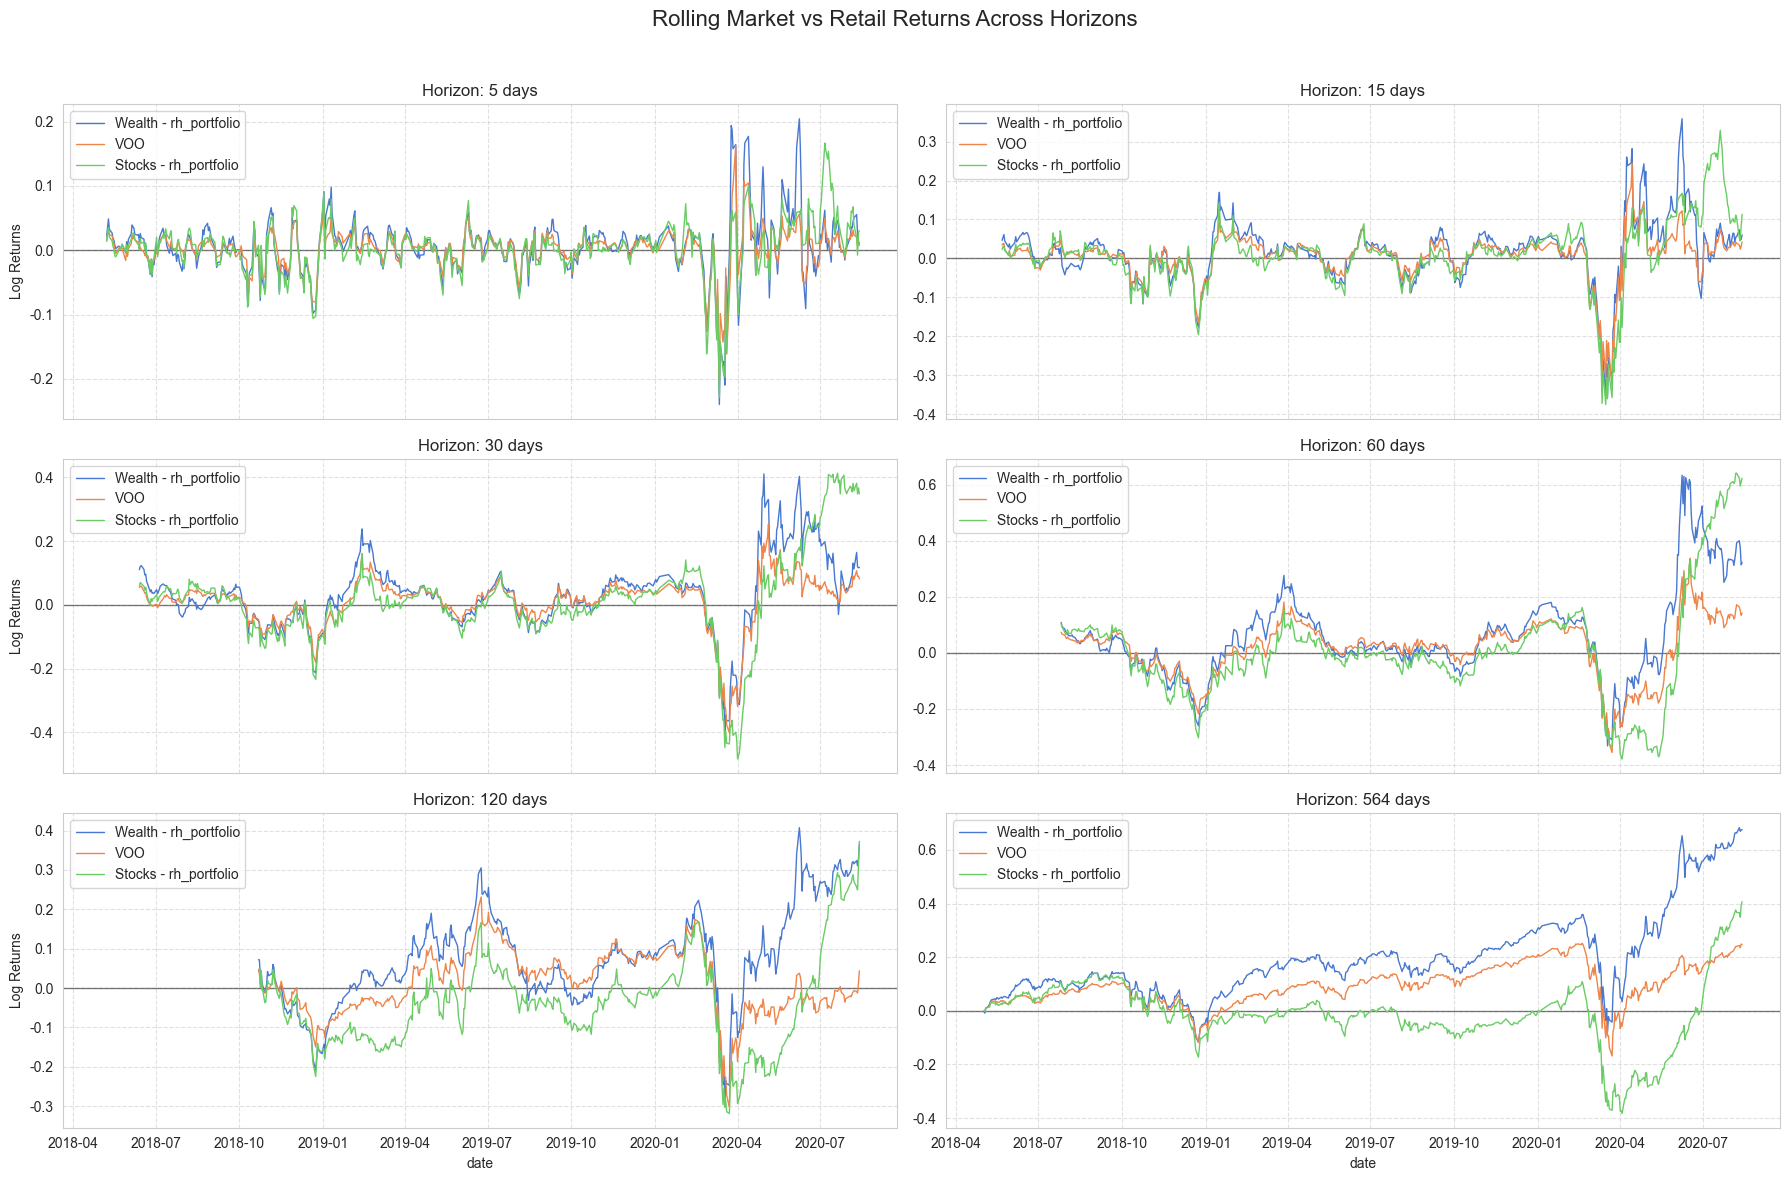

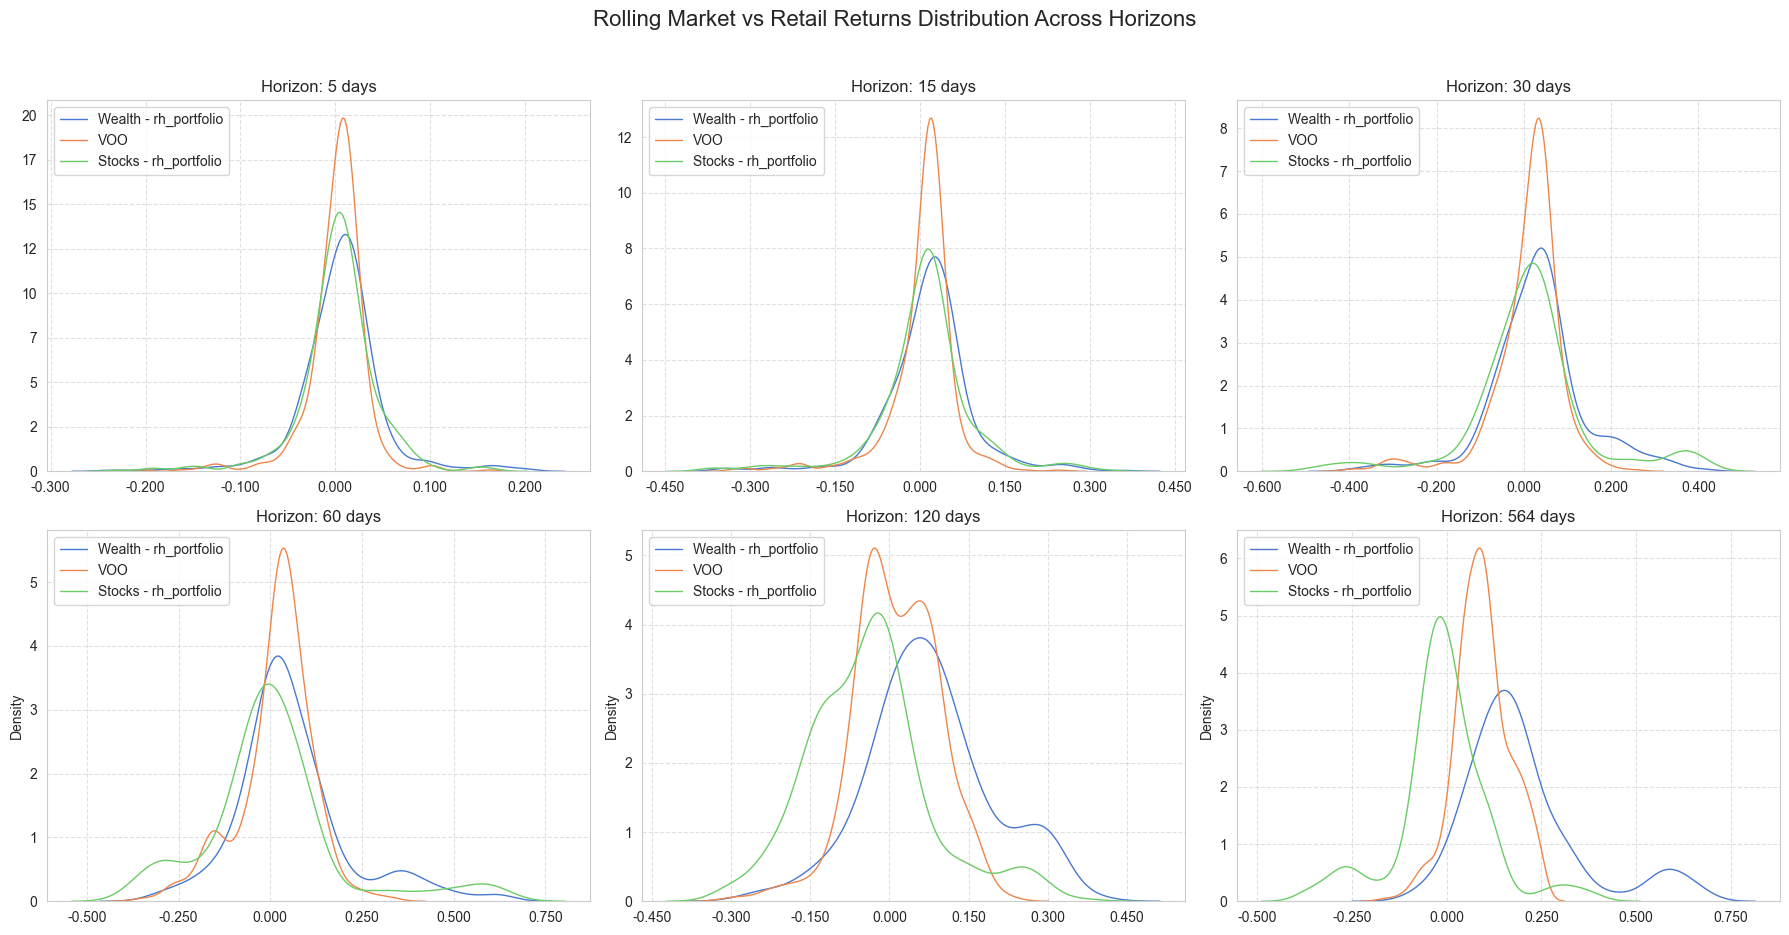

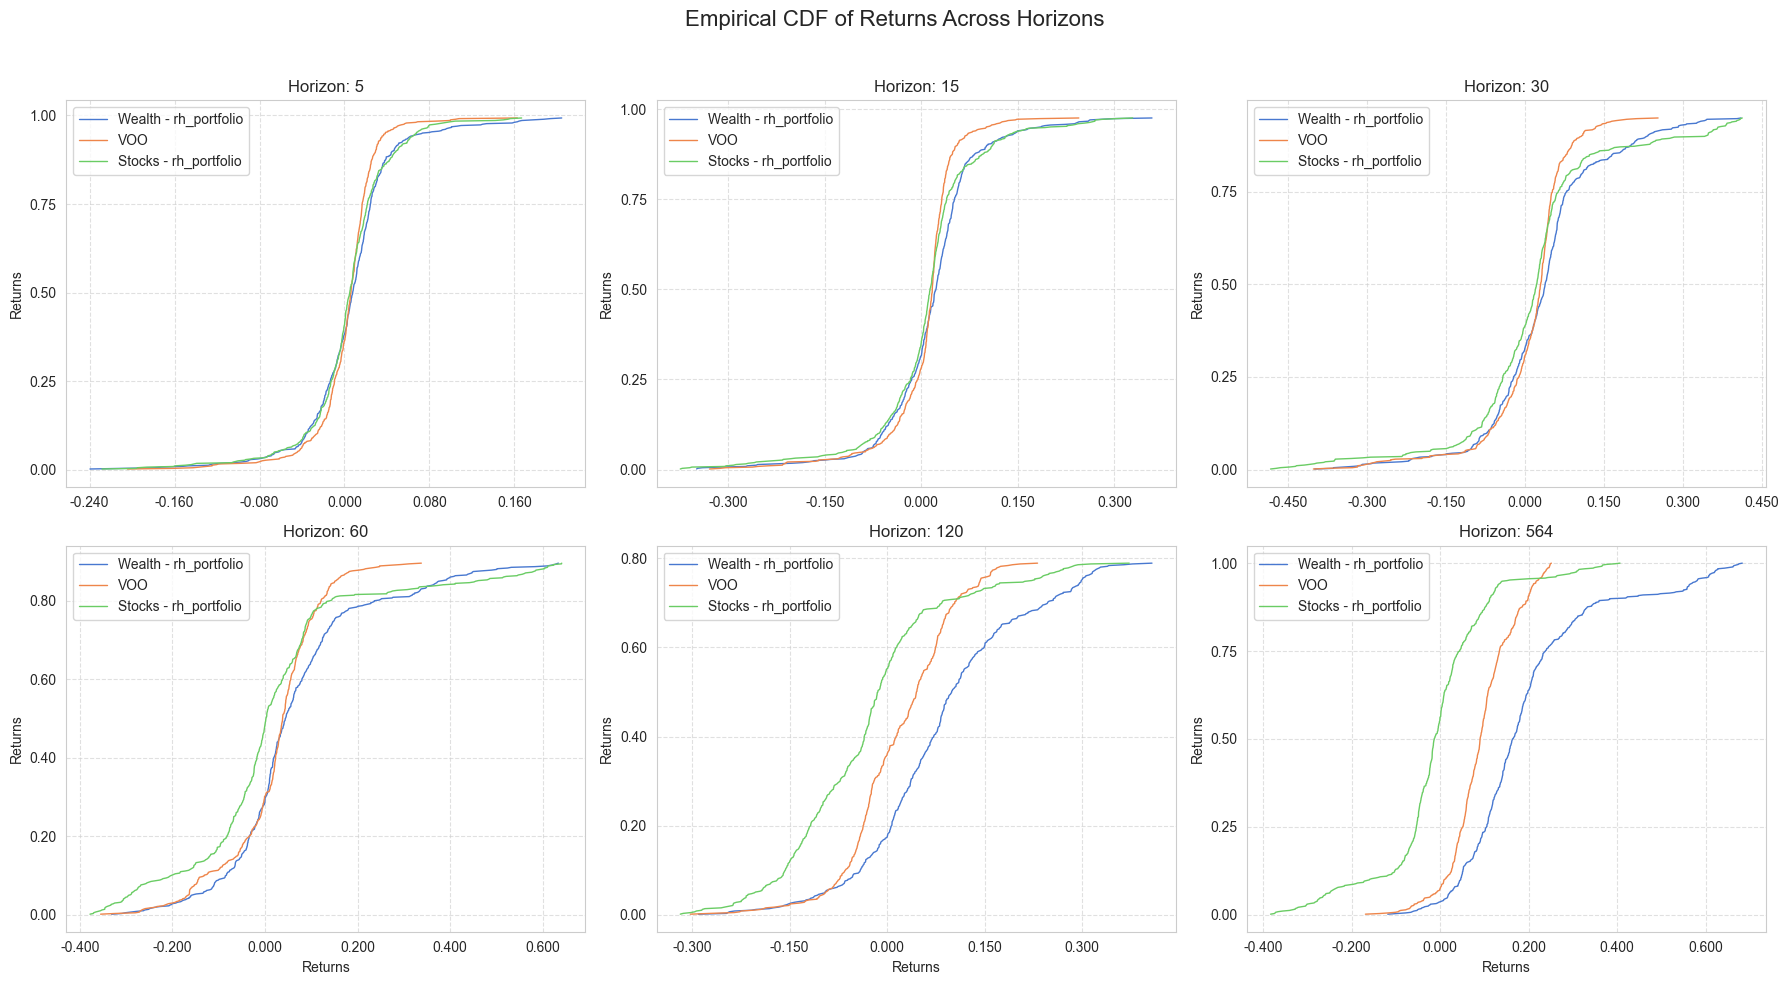

In [6]:
from src import Analyzer

a_w = Analyzer(weights_method="wealth", compare_tickers=["VOO"])
a_s = Analyzer(weights_method="stocks", compare_tickers=[])

r_w, h_w = a_w.build_returns()
r_s, h_s = a_s.build_returns()

from src.visuals.plotter import Plotter, ReturnSeries

plotter = Plotter([
    ReturnSeries(label="Wealth", df=r_w, horizons=h_w),
    ReturnSeries(label="Stocks", df=r_s, horizons=h_s)
])

plotter.plot_returns_timeseries()
plotter.plot_returns_kdes()
plotter.plot_returns_cdfs()

In [ ]:
from src.utils.metrics import test_first_order_stochastic_dominance
import numpy as np

result = test_first_order_stochastic_dominance(r_w["VOO_120_return"], r_s["rh_portfolio_120_return"])

diff = result[1] - result[2]
greater = np.where(diff>0, 0, 1)



array([800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812,
       813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825,
       826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838,
       839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851,
       852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864,
       865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877,
       878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888])

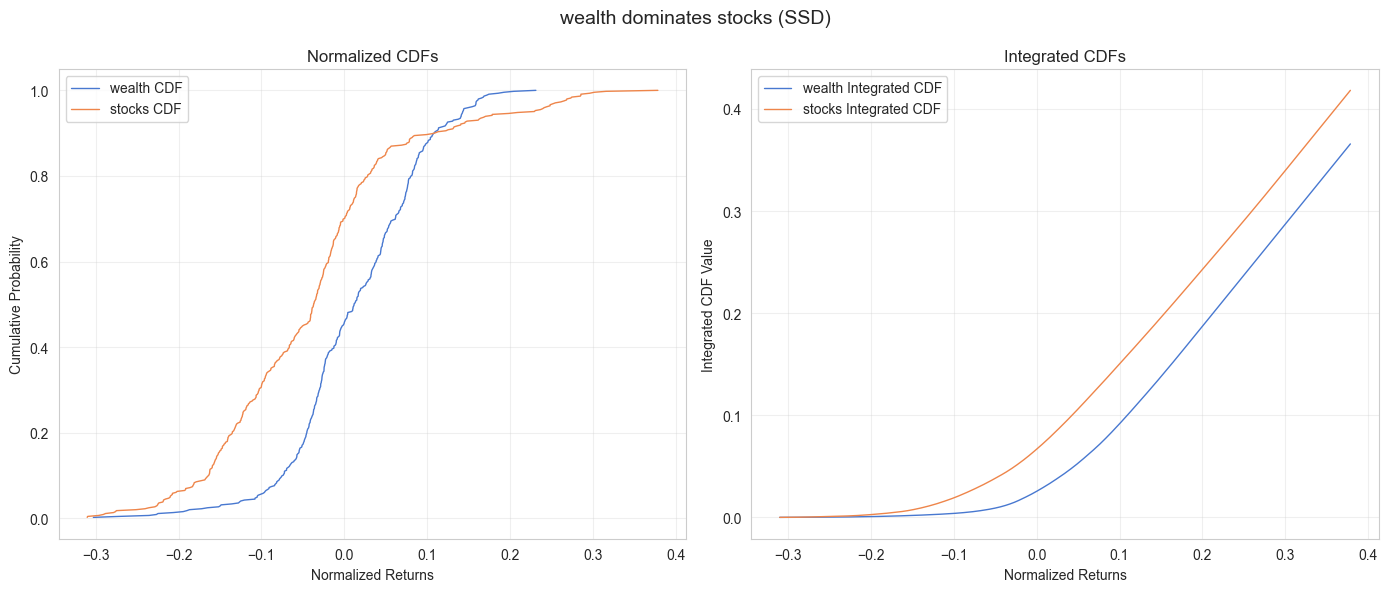

np.True_

In [38]:
plotter.plot_ssd_comparison(r_w["VOO_120_return"], r_s["rh_portfolio_120_return"], name_a="wealth", name_b="stocks")

In [ ]:
ret1 = a_w.build_returns()[0]
ret1

2025-04-11 13:21:53,635 - src.analyzer - DEBUG - self.return_params: ReturnParams(horizons={564, 5, 120, 60, 30, 15}, start_date=None, end_date=None, cumulative=True, append_start=False) (analyzer.py:231)


rh_portfolio       VOO  rh_portfolio_5_return  VOO_5_return  \
date                                                                      
2018-05-02     -0.003052  0.000000                    NaN           NaN   
2018-05-03     -0.005956 -0.002360                    NaN           NaN   
2018-05-04      0.016699  0.013179                    NaN           NaN   
2018-05-07      0.009010  0.003105                    NaN           NaN   
2018-05-08      0.004567 -0.000041               0.021268      0.013883   
...                  ...       ...                    ...           ...   
2020-08-07     -0.001822  0.000521               0.049351      0.023904   
2020-08-10      0.019488  0.003183               0.054591      0.020809   
2020-08-11     -0.014025 -0.008108               0.024670      0.008504   
2020-08-12      0.004795  0.013607               0.010599      0.015898   
2020-08-13      0.001208 -0.001711               0.009644      0.007491   

            rh_portfolio_15_return  VOO_15_return  rh_portfolio_30_return  \
date                                                                        
2018-05-02                     NaN            NaN                     NaN   
2018-05-03                     NaN            NaN                     NaN   
2018-05-04                     NaN            NaN                     NaN   
2018-05-07                     NaN            NaN                     NaN   
2018-05-08                     NaN            NaN                     NaN   
...                            ...            ...                     ...   
2020-08-07                0.045304       0.039182                0.098718   
2020-08-10                0.062655       0.034076                0.150360   
2020-08-11                0.036045       0.023889                0.104516   
2020-08-12                0.038378       0.031820                0.102364   
2020-08-13                0.049954       0.042134                0.103264   

            VOO_30_return  rh_portfolio_60_return  VOO_60_return  \
date                                                               
2018-05-02            NaN                     NaN            NaN   
2018-05-03            NaN                     NaN            NaN   
2018-05-04            NaN                     NaN            NaN   
2018-05-07            NaN                     NaN            NaN   
2018-05-08            NaN                     NaN            NaN   
...                   ...                     ...            ...   
2020-08-07       0.079891                0.360799       0.172196   
2020-08-10       0.106789                0.367647       0.163393   
2020-08-11       0.089377                0.343309       0.150789   
2020-08-12       0.089736                0.283031       0.134287   
2020-08-13       0.081204                0.291995       0.142065   

            rh_portfolio_120_return  VOO_120_return  rh_portfolio_564_return  \
date                                                                           
2018-05-02                      NaN             NaN                -0.003052   
2018-05-03                      NaN             NaN                -0.009007   
2018-05-04                      NaN             NaN                 0.007691   
2018-05-07                      NaN             NaN                 0.016701   
2018-05-08                      NaN             NaN                 0.021268   
...                             ...             ...                      ...   
2020-08-07                 0.266335       -0.006712                 0.594524   
2020-08-10                 0.273753       -0.008333                 0.614012   
2020-08-11                 0.260277       -0.012509                 0.599987   
2020-08-12                 0.278006        0.011516                 0.604782   
2020-08-13                 0.313950        0.043821                 0.605990   

            VOO_564_return  
date                        
2018-05-02        0.000000  
2018-05-03       -0.0

In [ ]:
ret2 = a_s.build_returns()[0]
ret2

2025-04-11 14:07:13,092 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:166)


rh_portfolio  rh_portfolio_5_return  rh_portfolio_15_return  \
date                                                                      
2018-05-02      0.000000                    NaN                     NaN   
2018-05-03     -0.002233                    NaN                     NaN   
2018-05-04      0.014038                    NaN                     NaN   
2018-05-07      0.007964                    NaN                     NaN   
2018-05-08     -0.004337               0.015431                     NaN   
...                  ...                    ...                     ...   
2020-08-07     -0.013537               0.043337                0.101779   
2020-08-10      0.000133               0.022594                0.051950   
2020-08-11     -0.016213              -0.007701                0.047704   
2020-08-12      0.042412               0.020800                0.081913   
2020-08-13      0.016792               0.029587                0.122237   

            rh_portfolio_30_return  rh_portfolio_60_return  \
date                                                         
2018-05-02                     NaN                     NaN   
2018-05-03                     NaN                     NaN   
2018-05-04                     NaN                     NaN   
2018-05-07                     NaN                     NaN   
2018-05-08                     NaN                     NaN   
...                            ...                     ...   
2020-08-07                0.355840                0.644602   
2020-08-10                0.381808                0.628172   
2020-08-11                0.345349                0.598337   
2020-08-12                0.366075                0.610838   
2020-08-13                0.353640                0.627753   

            rh_portfolio_120_return  rh_portfolio_564_return  
date                                                          
2018-05-02                      NaN                 0.000000  
2018-05-03                      NaN                -0.002233  
2018-05-04                      NaN                 0.011805  
2018-05-07                      NaN                 0.019769  
2018-05-08                      NaN                 0.015431  
...                             ...                      ...  
2020-08-07                 0.274760                 0.370122  
2020-08-10                 0.261536                 0.370254  
2020-08-11                 0.254893                 0.354041  
2020-08-12                 0.316183                 0.396453  
2020-08-13                 0.378668                 0.413245  

[564 rows x 7 columns]

- Zero vs dropping

2025-04-13 17:11:42,455 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-13 17:11:44,704 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-13 17:11:49,963 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:167)


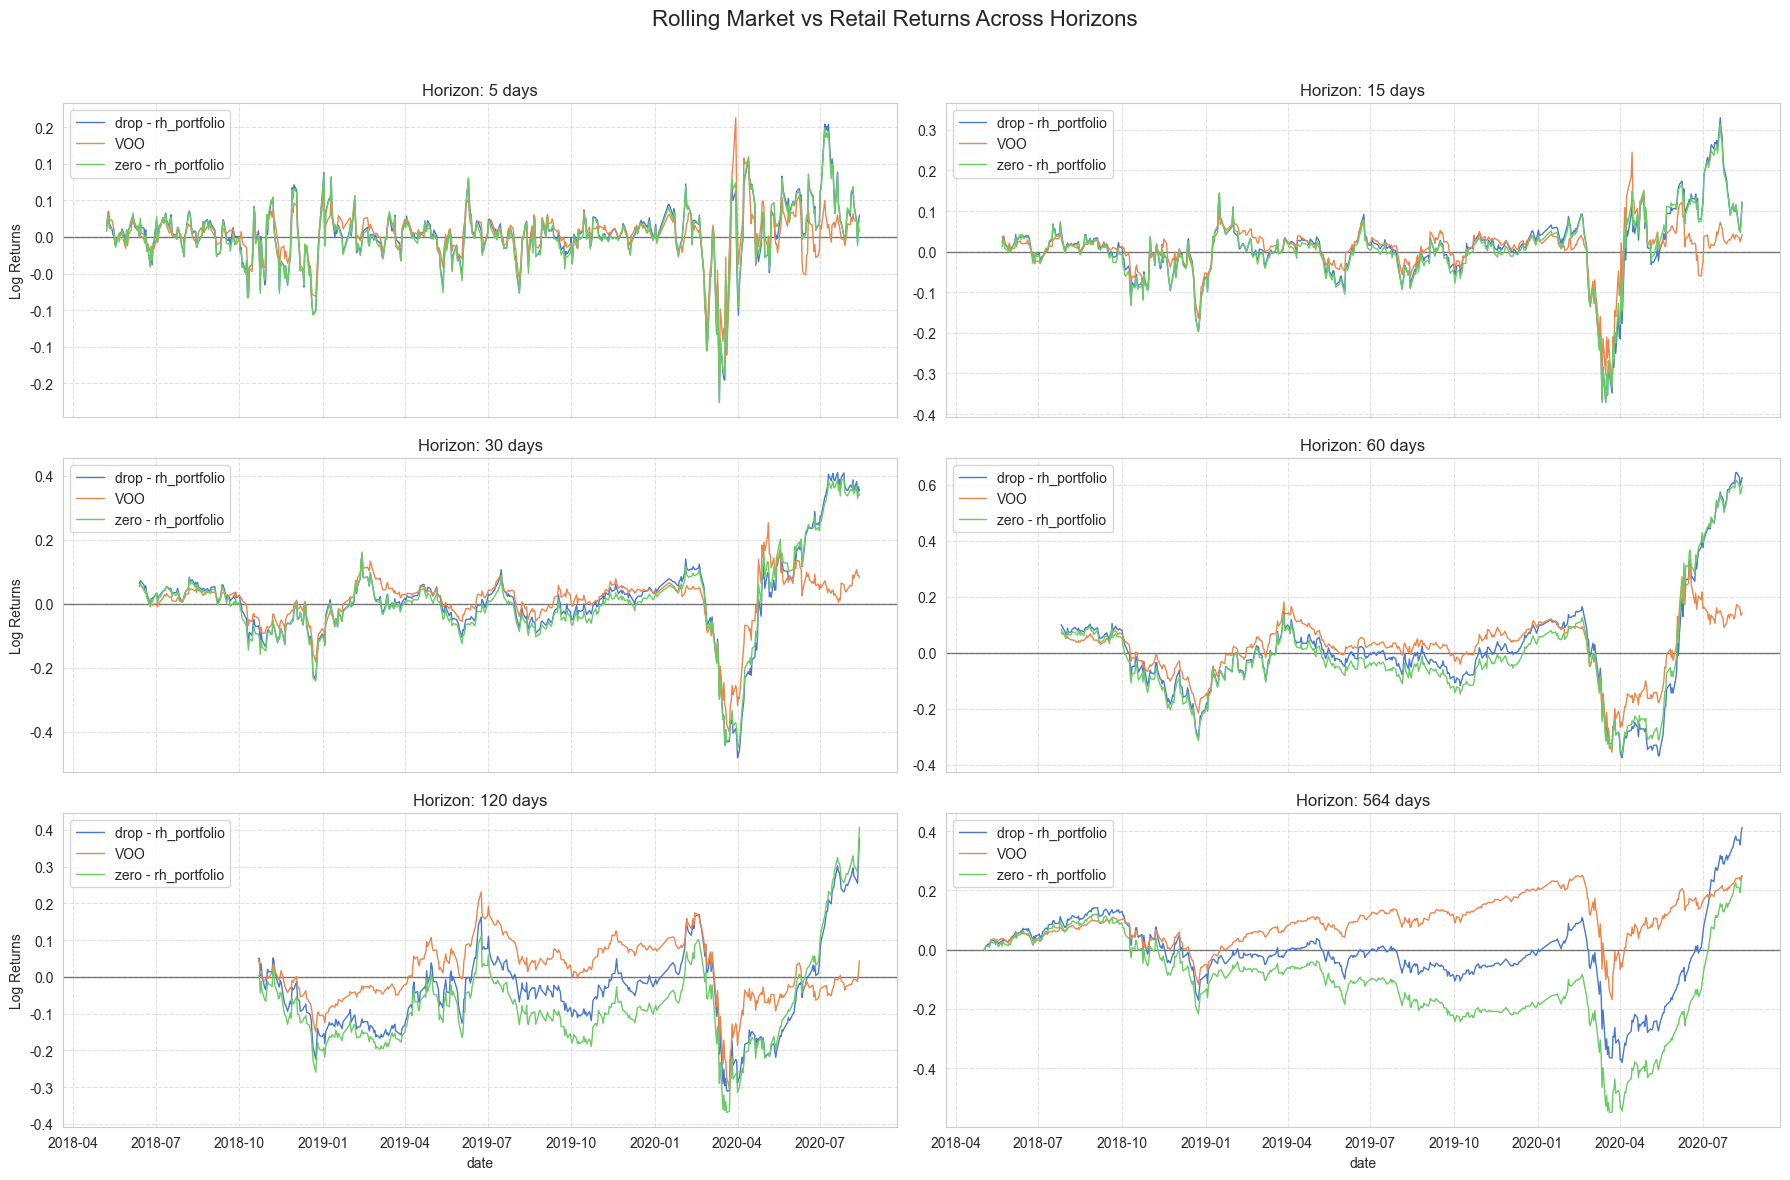

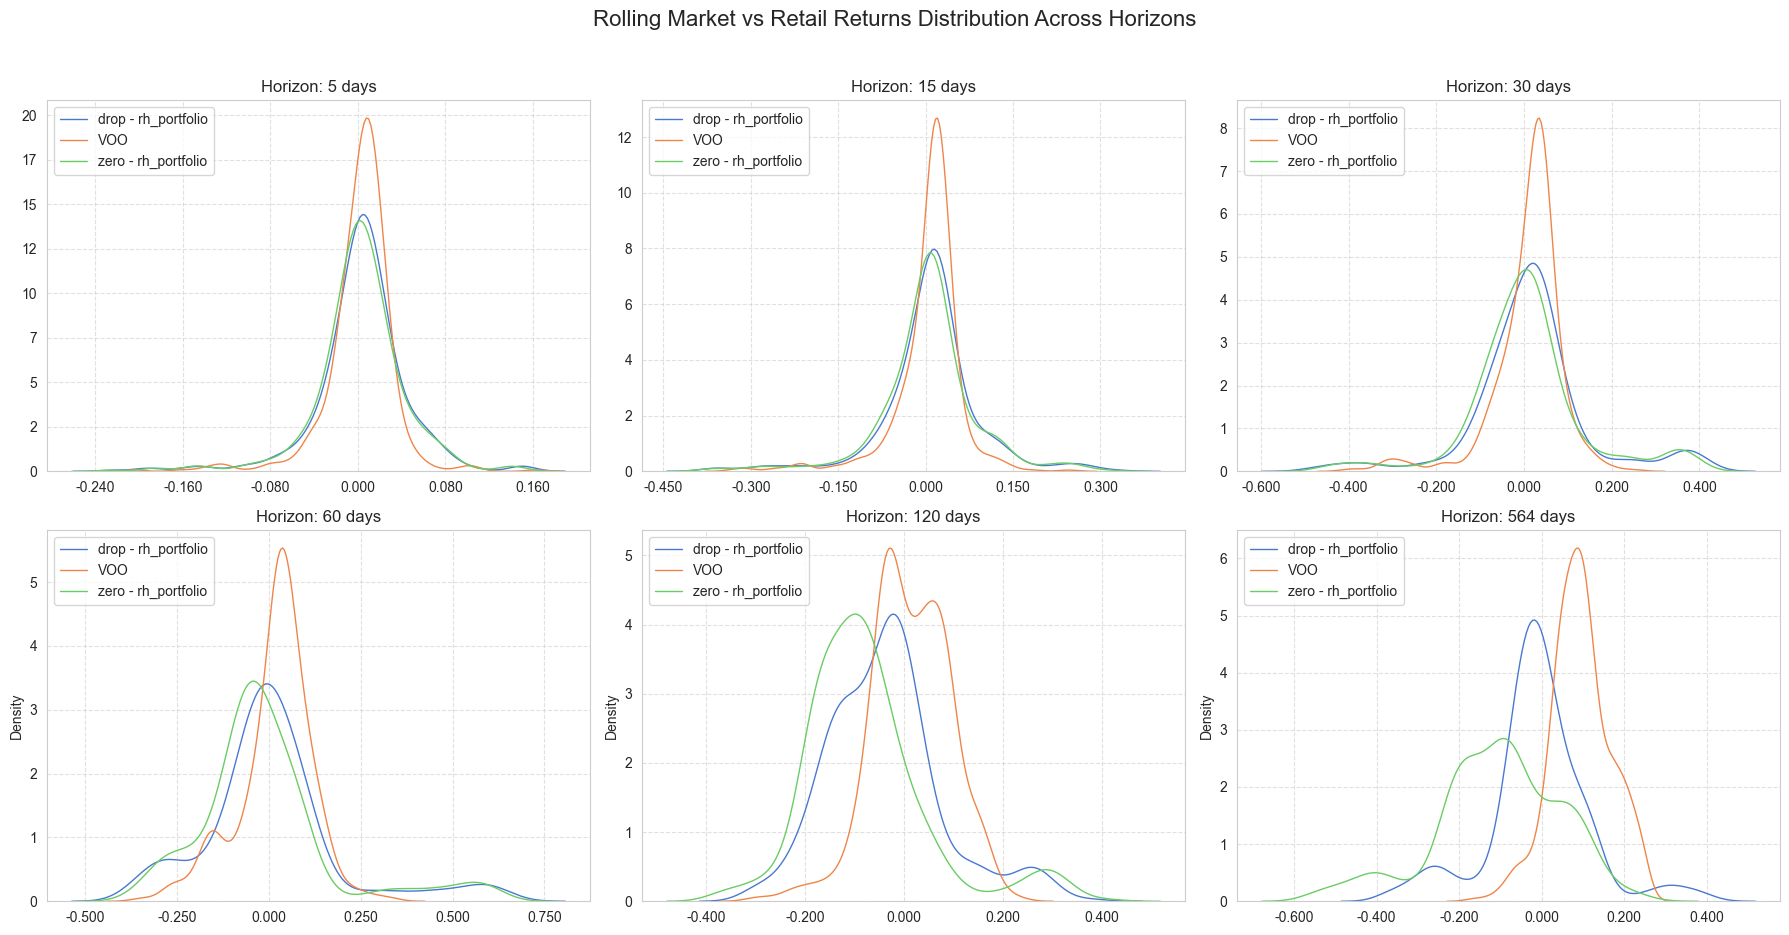

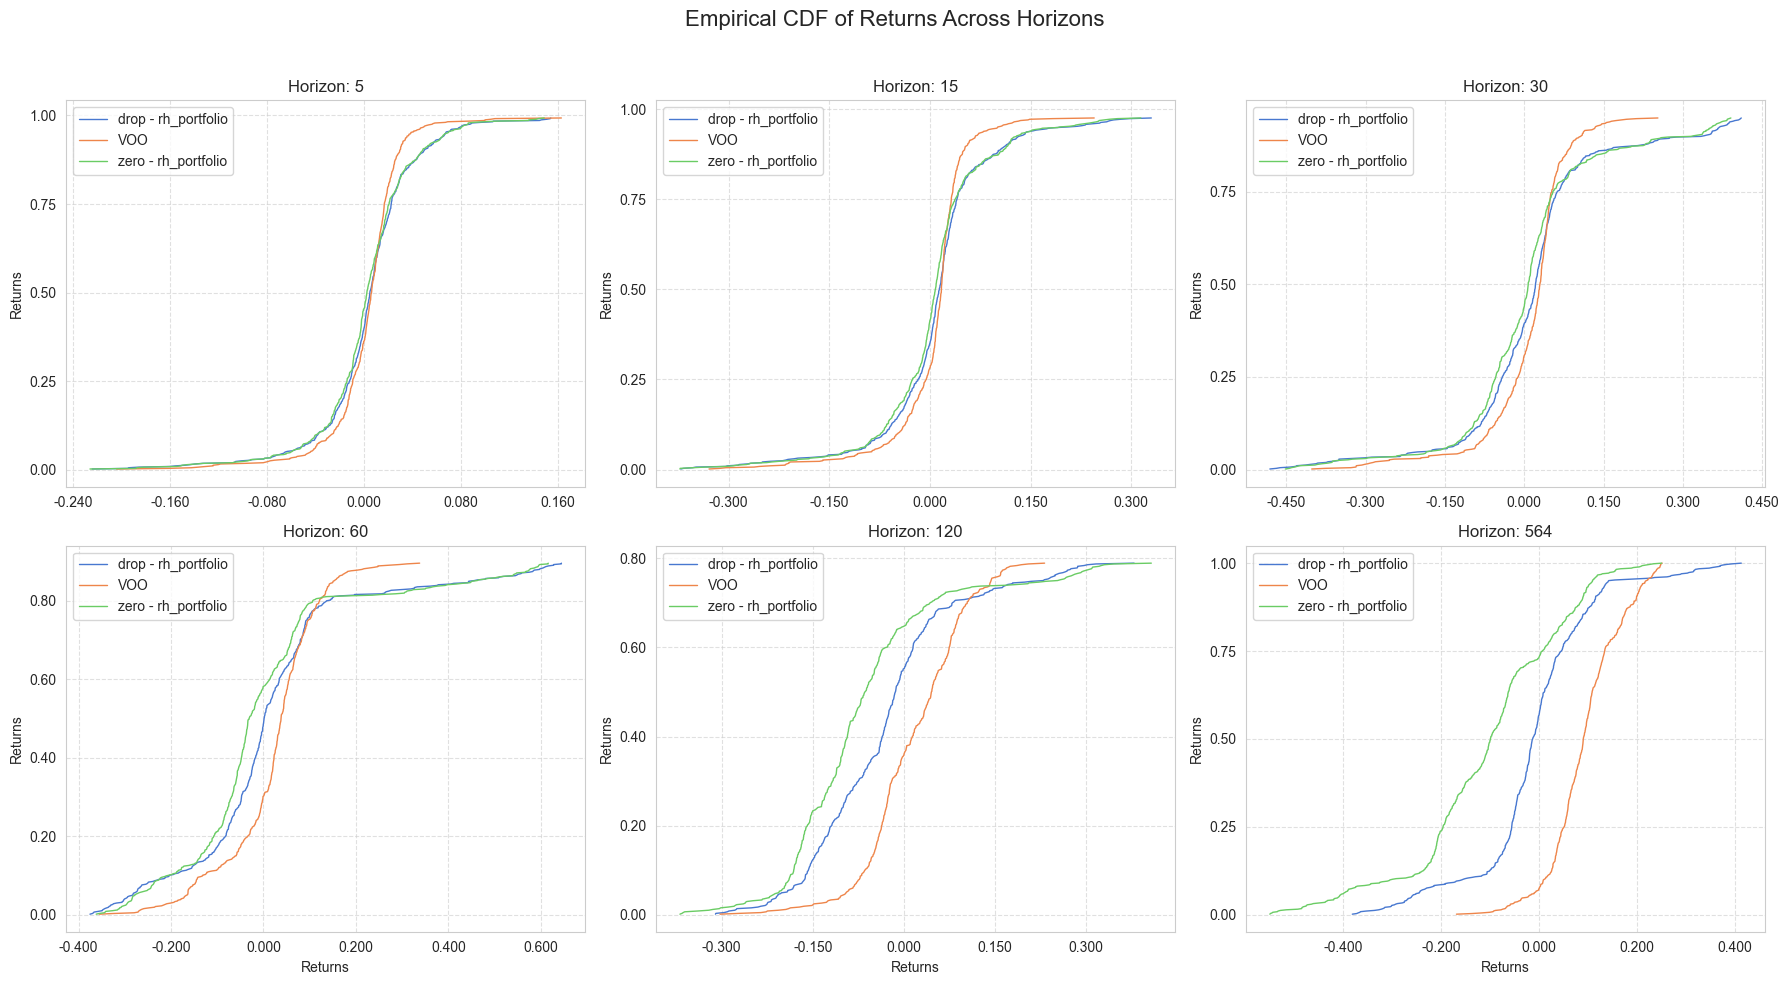

In [50]:
from src import Analyzer

a_d = Analyzer(weights_method="stocks", compare_tickers=["VOO"], dl_kwargs={"handle_nans": "drop"})
a_z = Analyzer(weights_method="stocks", compare_tickers=[], dl_kwargs={"handle_nans": "zero"})

r_d, h_d = a_d.build_returns()
r_z, h_z = a_z.build_returns()

from src.visuals.plotter import Plotter, ReturnSeries

plotter = Plotter([
    ReturnSeries(label="drop", df=r_d, horizons=h_d),
    ReturnSeries(label="zero", df=r_z, horizons=h_z)
])

plotter.plot_returns_timeseries()
plotter.plot_returns_kdes()
plotter.plot_returns_cdfs()

In [63]:
from src import DataLoader

dl = DataLoader(handle_nans="drop")

df = dl.merge_dfs()
df["ticker"].nunique()

4834

## Risk Aversion

- here I try to estimate risk aversion for different timeframes using CRRA
\begin{equation}
    U(W) = 
    \begin{cases}
    \frac{W^{1-\gamma}-1}{1-\gamma}, \gamma\neq 1\\
    \ln(W), \gamma = 1
    \end{cases}
\end{equation}

**Main Problem**: How should i compute the variance?

In [1]:
%load_ext autoreload
%autoreload 2

In [64]:
from src import Analyzer
import pandas as pd

an = Analyzer()
an.return_params = {"horizons":[1, 5, 30, 60, 120], "end_date":None, "cumulative":True, "append_start":False}

voo_rh = an.build_returns()[0]
voo_rh

2025-04-06 22:58:57,351 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)
2025-04-06 22:58:57,351 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)
2025-04-06 22:58:57,351 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)


rh_portfolio       VOO  rh_portfolio_1_return  VOO_1_return  \
date                                                                      
2018-05-02      0.000000  0.000000               0.000000      0.000000   
2018-05-03     -0.002247 -0.002360              -0.002247     -0.002360   
2018-05-04      0.014024  0.013179               0.014024      0.013179   
2018-05-07      0.007955  0.003105               0.007955      0.003105   
2018-05-08     -0.004306 -0.000041              -0.004306     -0.000041   
...                  ...       ...                    ...           ...   
2020-08-07     -0.013430  0.000521              -0.013430      0.000521   
2020-08-10      0.000239  0.003183               0.000239      0.003183   
2020-08-11     -0.016123 -0.008108              -0.016123     -0.008108   
2020-08-12      0.042356  0.013607               0.042356      0.013607   
2020-08-13      0.016768 -0.001711               0.016768     -0.001711   

            rh_portfolio_5_return  VOO_5_return  rh_portfolio_30_return  \
date                                                                      
2018-05-02                    NaN           NaN                     NaN   
2018-05-03                    NaN           NaN                     NaN   
2018-05-04                    NaN           NaN                     NaN   
2018-05-07                    NaN           NaN                     NaN   
2018-05-08               0.015426      0.013883                     NaN   
...                           ...           ...                     ...   
2020-08-07               0.042994      0.023904                0.355362   
2020-08-10               0.022503      0.020809                0.381376   
2020-08-11              -0.007306      0.008504                0.344959   
2020-08-12               0.021059      0.015898                0.365633   
2020-08-13               0.029811      0.007491                0.353258   

            VOO_30_return  rh_portfolio_60_return  VOO_60_return  \
date                                                               
2018-05-02            NaN                     NaN            NaN   
2018-05-03            NaN                     NaN            NaN   
2018-05-04            NaN                     NaN            NaN   
2018-05-07            NaN                     NaN            NaN   
2018-05-08            NaN                     NaN            NaN   
...                   ...                     ...            ...   
2020-08-07       0.079891                0.641470       0.172196   
2020-08-10       0.106789                0.625174       0.163393   
2020-08-11       0.089377                0.595460       0.150789   
2020-08-12       0.089736                0.607849       0.134287   
2020-08-13       0.081204                0.624783       0.142065   

            rh_portfolio_120_return  VOO_120_return  rh_portfolio_564_return  \
date                                                                           
2018-05-02                      NaN             NaN                 0.000000   
2018-05-03                      NaN             NaN                -0.002247   
2018-05-04                      NaN             NaN                 0.011777   
2018-05-07                      NaN             NaN                 0.019732   
2018-05-08                      NaN             NaN                 0.015426   
...                             ...             ...                      ...   
2020-08-07                 0.266849       -0.006712                 0.362484   
2020-08-10                 0.253757       -0.008333                 0.362723   
2020-08-11                 0.247178       -0.012509                 0.346600   
2020-08-12                 0.308375        0.011516                 0.388957   
2020-08-13                 0.370780        0.043821                 0.405724   

            VOO_564_return  
date                        
2018-05-02        0.000000  
2018-05-03       -0.002360  
2018-05-04        

In [3]:
def compute_crra_gamma(mean:float, risk_free:float, var:float):
    """
    Given the inputs it estimates the gamma of a CRRA utility function.

    Returns:
    - gamma : float
    """

    gamma = (mean - risk_free)/var + 1/2
    return gamma

rh_portfolio    1.129293
VOO             6.583666
Name: 2020-02-03 00:00:00, dtype: object
rh_portfolio    2.451961
VOO             2.264908
Name: 2020-08-12 00:00:00, dtype: object


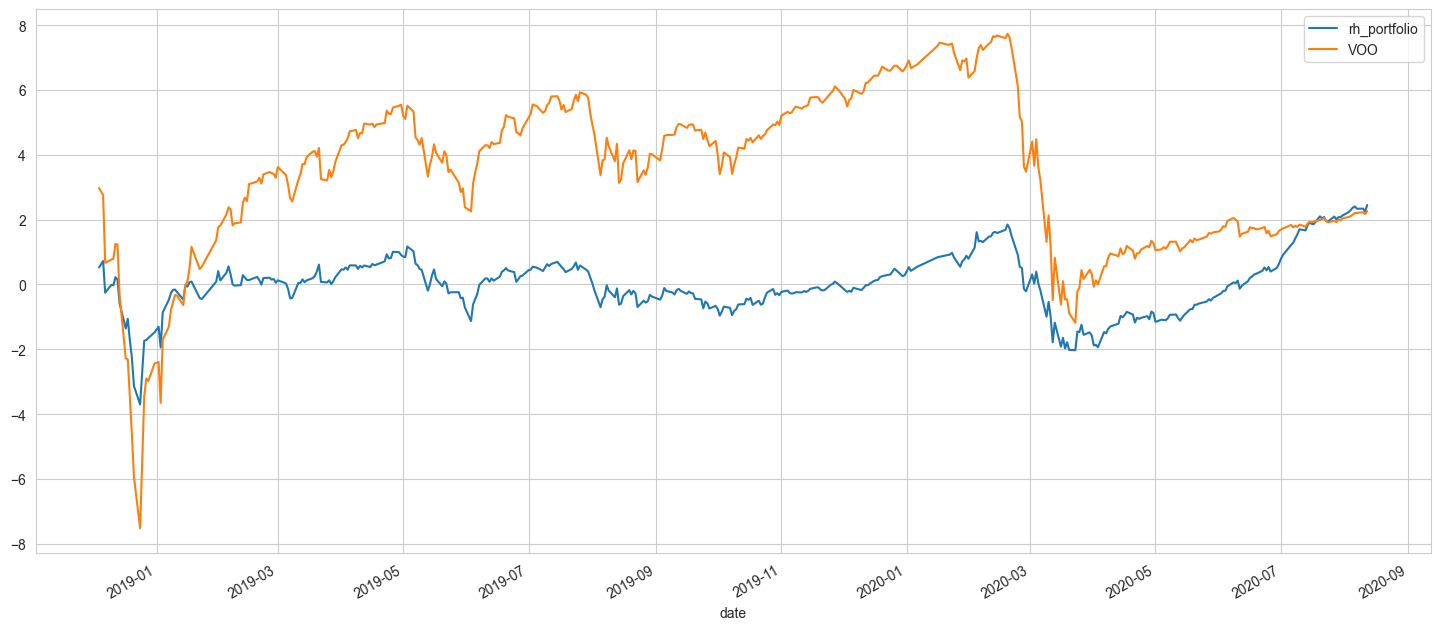

In [70]:

# Assuming voo_rh is your DataFrame
df_gamma = pd.DataFrame(index=voo_rh.index)
df_gamma["rh_portfolio"] = None
df_gamma["VOO"] = None

days = 1

#voo_rh = voo_rh / voo_rh.shift(days)
#voo_rh = voo_rh.dropna()
#print(voo_rh)

# Iterate over the range and compute gamma for each window
for d in range(150, len(voo_rh)):
    window = voo_rh.head(d)

    # Compute CRRA gamma for 'rh_portfolio_5_return' and 'VOO_5_return'
    gamma_rh = compute_crra_gamma(window[f"rh_portfolio_{days}_return"].mean(), 0, window[f"rh_portfolio_{days}_return"].var())
    gamma_voo = compute_crra_gamma(window[f"VOO_{days}_return"].mean(), 0, window[f"VOO_{days}_return"].var())

    #mean_rh = window[f"rh_portfolio_{days}_return"].mean()
    #mean_voo = window[f"VOO_{days}_return"].mean()
    
    # Assign the computed gamma to the corresponding rows
    #df_gamma.loc[window.index[-1], "rh_portfolio"] = mean_rh
    #df_gamma.loc[window.index[-1], "VOO"] = mean_voo
    df_gamma.loc[window.index[-1], "rh_portfolio"] = gamma_rh
    df_gamma.loc[window.index[-1], "VOO"] = gamma_voo

# Check if df_gamma contains values
df_gamma = df_gamma.dropna()

# Optionally, plot the results
df_gamma.plot(kind="line", figsize=(18, 8))

print(df_gamma.loc["2020-02-03"])
print(df_gamma.iloc[-1])

rh_portfolio    0.867785
VOO             6.735428
Name: 2020-02-03 00:00:00, dtype: object
rh_portfolio    2.338959
VOO              2.69506
Name: 2020-08-12 00:00:00, dtype: object


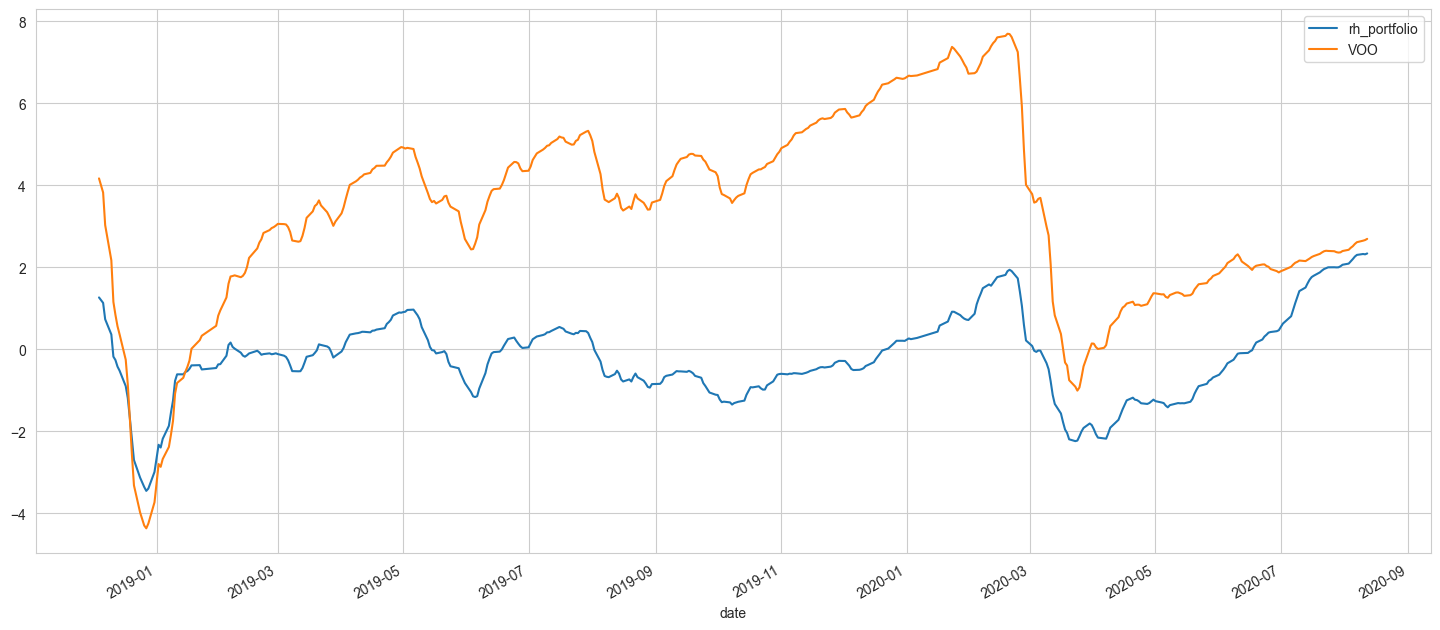

In [71]:

# Assuming voo_rh is your DataFrame
df_gamma = pd.DataFrame(index=voo_rh.index)
df_gamma["rh_portfolio"] = None
df_gamma["VOO"] = None

days = 5

#voo_rh = voo_rh / voo_rh.shift(days)
#voo_rh = voo_rh.dropna()
#print(voo_rh)

# Iterate over the range and compute gamma for each window
for d in range(150, len(voo_rh)):
    window = voo_rh.head(d)

    # Compute CRRA gamma for 'rh_portfolio_5_return' and 'VOO_5_return'
    gamma_rh = compute_crra_gamma(window[f"rh_portfolio_{days}_return"].mean(), 0, window[f"rh_portfolio_{days}_return"].var())
    gamma_voo = compute_crra_gamma(window[f"VOO_{days}_return"].mean(), 0, window[f"VOO_{days}_return"].var())

    #mean_rh = window[f"rh_portfolio_{days}_return"].mean()
    #mean_voo = window[f"VOO_{days}_return"].mean()
    
    # Assign the computed gamma to the corresponding rows
    #df_gamma.loc[window.index[-1], "rh_portfolio"] = mean_rh
    #df_gamma.loc[window.index[-1], "VOO"] = mean_voo
    df_gamma.loc[window.index[-1], "rh_portfolio"] = gamma_rh
    df_gamma.loc[window.index[-1], "VOO"] = gamma_voo

# Check if df_gamma contains values
df_gamma = df_gamma.dropna()

# Optionally, plot the results
df_gamma.plot(kind="line", figsize=(18, 8))

print(df_gamma.loc["2020-02-03"])
print(df_gamma.iloc[-1])

In [5]:
df_gamma.median()

rh_portfolio    0.003085
VOO             3.726202
dtype: object

In [6]:
print(df_gamma.loc["2020-02-03"])
print(df_gamma.iloc[-1])

rh_portfolio    1.129293
VOO             6.583666
Name: 2020-02-03 00:00:00, dtype: object
rh_portfolio    2.451961
VOO             2.264908
Name: 2020-08-12 00:00:00, dtype: object


- In this other method i compute the gross returns then i get the utility for them and get the mean, i.e. the expectation.
- This is sensible in the last days of the sample, otherwise it would imply perfect foresight.
    - To adress this i can iterate over each day and get the returns up to that point

### All Possible Windows 

In [81]:
from src import Analyzer
import pandas as pd

an = Analyzer(compare_tickers=["VOO", "VT"])

2025-04-06 23:06:52,663 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)
2025-04-06 23:06:52,663 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)
2025-04-06 23:06:52,663 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)


In [82]:
#df_merged = an.df_merged[an.df_merged["date"]<="2020-02-03"]
df_merged = an.df_merged

df_merged

date  prc_adj  popularity ticker
0       2018-05-02    65.91    0.000113      A
1       2018-05-03    66.34    0.000113      A
2       2018-05-04    67.00    0.000113      A
3       2018-05-07    67.39    0.000113      A
4       2018-05-08    67.37    0.000111      A
...            ...      ...         ...    ...
2874703 2020-08-07     4.22    0.000993   ZYNE
2874704 2020-08-10     4.24    0.000988   ZYNE
2874705 2020-08-11     4.07    0.000983   ZYNE
2874706 2020-08-12     3.96    0.000981   ZYNE
2874707 2020-08-13     3.93    0.000979   ZYNE

[2874708 rows x 4 columns]

In [83]:
levels_rh = an.build_levels()
levels_rh.index = pd.to_datetime(levels_rh.index)
levels_rh

rh_portfolio        VOO     VT
date                                      
2018-05-02     96.041674  241.78000  73.62
2018-05-03     95.826112  241.21001  73.59
2018-05-04     97.179437  244.41000  74.22
2018-05-07     97.955565  245.17000  74.33
2018-05-08     97.534681  245.16000  74.34
...                  ...        ...    ...
2020-08-07    138.001671  307.35999  80.69
2020-08-10    138.034713  308.34000  80.91
2020-08-11    135.827047  305.85001  80.66
2020-08-12    141.703779  310.04001  81.87
2020-08-13    144.099853  309.51001  81.65

[564 rows x 3 columns]

In [84]:
# Set doesnt allow to duplicate items
all_windows = set()

# get dates to iterate on
df_merged["date"] = pd.to_datetime(df_merged["date"])
dates = df_merged["date"].unique()


for date1 in dates:
    for date2 in dates:
        # Order the dates so that i dont have problems in computing reteurns and i dont have tuples with the same value in different order 
        if date2>date1:
            inner_tuple = (date1, date2)
            all_windows.add(inner_tuple)


all_windows = list(all_windows)


In [85]:
from tqdm import tqdm
import pandas as pd
import numpy as np

all_ret = []
for window in tqdm(all_windows):

    # get first and last value (days)
    beg = window[0]
    end = window[1]
    
    # Compute days between them

    # compute gross returns
    ret = levels_rh.loc[end]/levels_rh.loc[beg]

    all_ret.append(ret)

# Create DataFrame from the list of Series
all_ret_df = pd.DataFrame(all_ret)

# Assign MultiIndex with start and end dates
all_ret_df.index = pd.MultiIndex.from_tuples(all_windows, names=["start_date", "end_date"])

all_ret_df['date_difference'] = all_ret_df.index.map(lambda x: (x[1] - x[0]).days)



100%|██████████| 158766/158766 [00:18<00:00, 8718.39it/s] 


<Axes: ylabel='Density'>

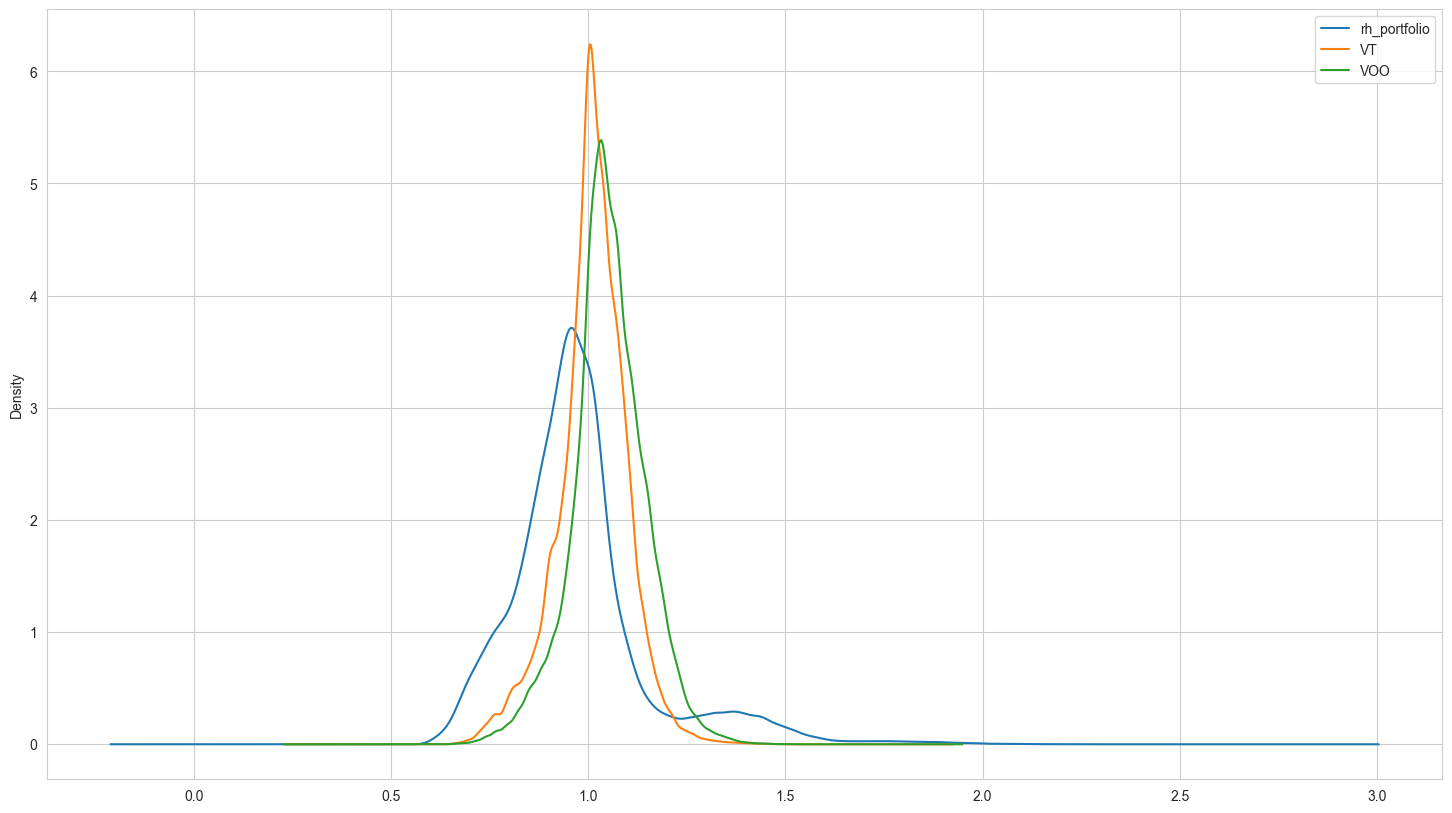

In [87]:
all_ret_df[["rh_portfolio", "VT", "VOO"]].plot(kind="kde", figsize=(18,10))

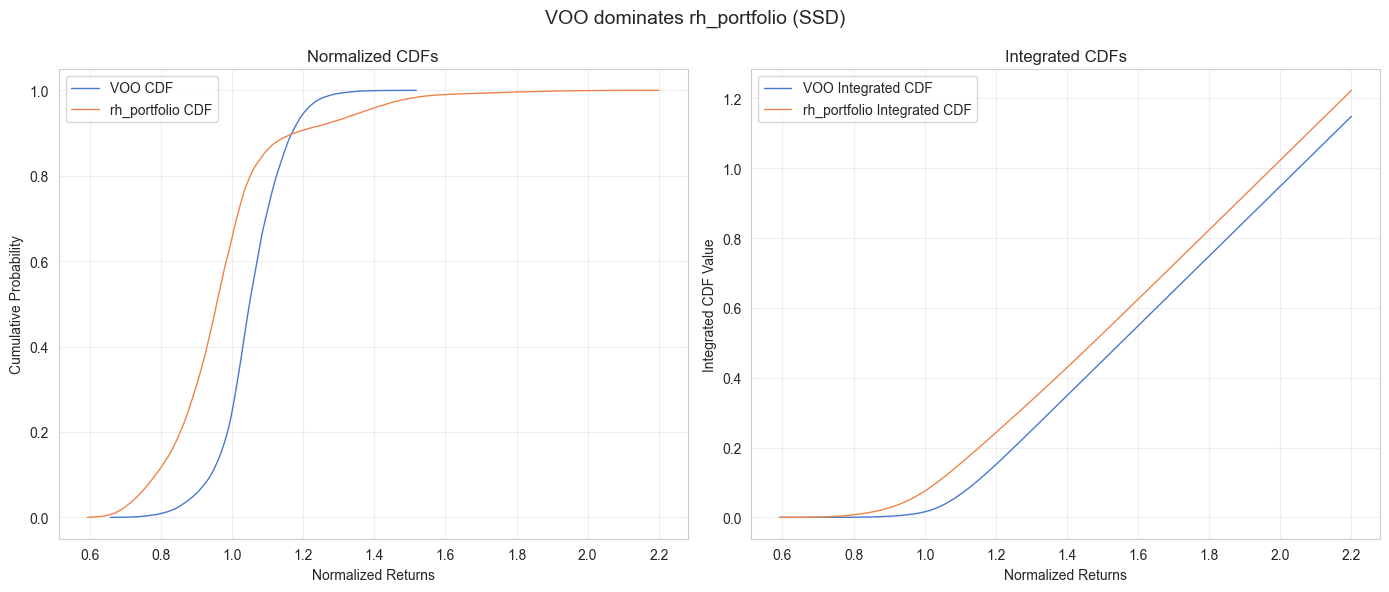

np.True_

In [88]:
an.plot_ssd_comparison("VOO", "rh_portfolio", all_ret_df)

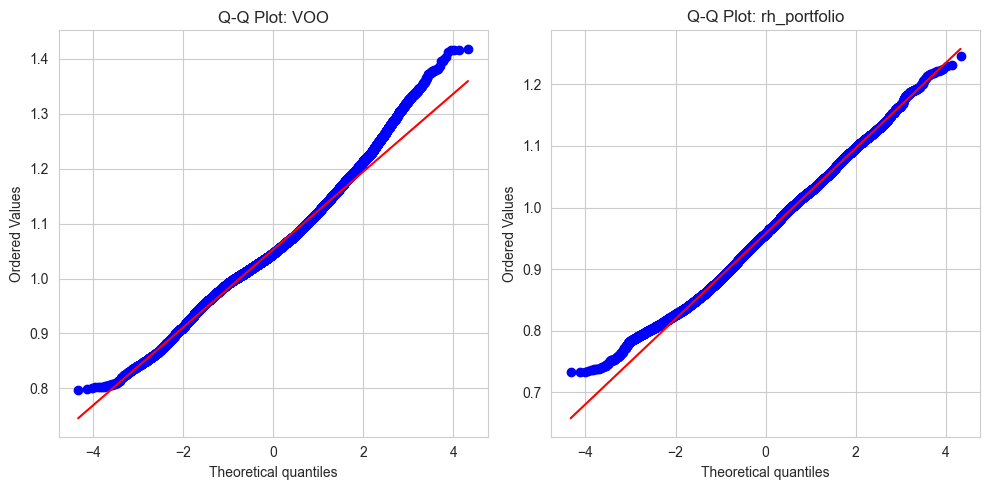

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# List of columns you want to plot
columns_to_plot = ["VOO", "rh_portfolio"]  # Replace with your actual column names

# Set the number of rows and columns for subplots
n_cols = 2
n_cols = int(np.ceil(len(columns_to_plot) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_cols, n_cols, figsize=(10, 5 * n_cols))

# Flatten axes for easy indexing
axes = axes.flatten()

# Generate Q-Q plots
for i, column in enumerate(columns_to_plot):
    data = all_ret_df[column].dropna()
    stats.probplot(data, dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {column}")
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [10]:
df

date ticker       holders  shrcd  divamt    prc        vol  \
0       2018-05-02      A    590.000000   11.0     0.0  65.91  2240482.0   
1       2018-05-03      A    586.473684   11.0     0.0  66.34  2365851.0   
2       2018-05-04      A    587.458333   11.0     0.0  67.00  1331017.0   
3       2018-05-07      A    585.900000   11.0     0.0  67.39  1468735.0   
4       2018-05-08      A    577.125000   11.0     0.0  67.37  1916103.0   
...            ...    ...           ...    ...     ...    ...        ...   
2726371 2020-08-07   ZYNE  32151.291667   11.0     0.0   4.22   542213.0   
2726372 2020-08-10   ZYNE  32060.833333   11.0     0.0   4.24   584599.0   
2726373 2020-08-11   ZYNE  31939.875000   11.0     0.0   4.07   449620.0   
2726374 2020-08-12   ZYNE  31851.578947   11.0     0.0   3.96   980844.0   
2726375 2020-08-13   ZYNE  31798.650000   11.0     0.0   3.93   392978.0   

              ret    shrout  cfacshr_adj  ...  prc_adj_div  log_returns  \
0       -0.004982  322477.0          1.0  ...        65.91    -0.004994   
1        0.006524  322477.0          1.0  ...        66.34     0.006503   
2        0.009949  322477.0          1.0  ...        67.00     0.009900   
3        0.005821  322477.0          1.0  ...        67.39     0.005804   
4       -0.000297  322477.0          1.0  ...        67.37    -0.000297   
...           ...       ...          ...  ...          ...          ...   
2726371 -0.018605   29255.0          1.0  ...         4.22    -0.018780   
2726372  0.004739   29255.0          1.0  ...         4.24     0.004728   
2726373 -0.040094   29255.0          1.0  ...         4.07    -0.040920   
2726374 -0.027027   29255.0          1.0  ...         3.96    -0.027399   
2726375 -0.007576   29255.0          1.0  ...         3.93    -0.007605   

                   mc  market_weight  holders_change_pct  holders_change_diff  \
0        2.125446e+10       0.000666                 NaN                  NaN   
1        2.139312e+10       0.000672           -0.005995            -3.526316   
2        2.160596e+10       0.000670            0.001678             0.984649   
3        2.173173e+10       0.000671           -0.002656            -1.558333   
4        2.172528e+10       0.000670           -0.015090            -8.775000   
...               ...            ...                 ...                  ...   
2726371  1.234561e+08       0.000003           -0.002452           -78.916667   
2726372  1.240412e+08       0.000003           -0.002817           -90.458333   
2726373  1.190679e+08       0.000003           -0.003780          -120.958333   
2726374  1.158498e+08       0.000003           -0.002768           -88.296053   
2726375  1.149722e+08       0.000003           -0.001663           -52.928947   

         total_holders  popularity  total_holders_change_pct  \
0         5.149208e+06    0.000115                       NaN   
1         5.157362e+06    0.000114                  0.001584   
2         5.154727e+06    0.000114                 -0.000511   
3         5.144404e+06    0.000114                 -0.002003   
4         5.150438e+06    0.000112                  0.001173   
...                ...         ...                       ...   
2726371   3.195550e+07    0.001006                  0.001730   
2726372   3.202095e+07    0.001001                  0.002048   
2726373   3.205866e+07    0.000996                  0.001178   
2726374   3.204369e+07    0.000994                 -0.000467   
2726375   3.204309e+07    0.000992                 -0.000019   

         total_holders_change_diff  
0                              NaN  
1                      8154.307895  
2                     -2634.355902  
3                    -10323.618892  
4                      6034.329778  
...                            ...  
2726371               55192.625000  
2726372               65446.583333  
2726373               37717.333333  
2726374              -14973.646930  
2726375                -599.794737  

[2726376 rows

In [4]:
from src import  DataLoader

dl = DataLoader(handle_nans="drop", load_merged=False)
df_merged = dl.merge_dfs()
df_merged

2025-04-16 12:01:16,835 - src.data_loader - DEBUG - self.df_robinhood_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_rh_last.parquet (data_loader.py:59)
2025-04-16 12:01:16,836 - src.data_loader - DEBUG - self.df_wrds_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_wrds.parquet (data_loader.py:60)
2025-04-16 12:01:16,836 - src.data_loader - DEBUG - self.df_crsp_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_crsp_div.parquet (data_loader.py:61)
2025-04-16 12:01:16,837 - src.data_loader - DEBUG - self.df_merged_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_merged_drop.parquet (data_loader.py:62)
2025-04-16 12:01:16,838 - src.data_loader - DEBUG - load_merged:  False (data_loader.py:191)


2025-04-16 12:01:17,619 - src.data_loader - INFO - Robinhood data loaded (data_loader.py:114)
2025-04-16 12:01:19,391 - src.data_loader - INFO - CRSP data loaded (data_loader.py:134)
2025-04-16 12:01:20,905 - src.data_loader - DEBUG - len inner_tickers: 5220 (data_loader.py:343)
2025-04-16 12:01:23,725 - src.data_loader - DEBUG - self.df_rh_long['ticker'].nunique(): 5221 (data_loader.py:253)
2025-04-16 12:01:25,031 - src.data_loader - DEBUG - self.df_crsp['ticker'].nunique(): 5220 (data_loader.py:276)
2025-04-16 12:01:27,895 - src.data_loader - DEBUG - df_merged['ticker'].nunique(): 5220 (data_loader.py:278)
2025-04-16 12:01:39,033 - src.data_loader - INFO - DataFrames merged (data_loader.py:327)


date ticker  holders  permno  shrcd  divamt    prc        vol  \
0       2018-05-02      A    590.0   87432   11.0     0.0  65.91  2240482.0   
1       2018-05-03      A    587.0   87432   11.0     0.0  66.34  2365851.0   
2       2018-05-04      A    588.0   87432   11.0     0.0  67.00  1331017.0   
3       2018-05-07      A    576.0   87432   11.0     0.0  67.39  1468735.0   
4       2018-05-08      A    580.0   87432   11.0     0.0  67.37  1916103.0   
...            ...    ...      ...     ...    ...     ...    ...        ...   
2914202 2020-08-07   ZYNE  32098.0   15646   11.0     0.0   4.22   542213.0   
2914203 2020-08-10   ZYNE  31977.0   15646   11.0     0.0   4.24   584599.0   
2914204 2020-08-11   ZYNE  31860.0   15646   11.0     0.0   4.07   449620.0   
2914205 2020-08-12   ZYNE  31821.0   15646   11.0     0.0   3.96   980844.0   
2914206 2020-08-13   ZYNE  31720.0   15646   11.0     0.0   3.93   392978.0   

              ret    shrout  ...  prc_adj_div  log_returns            mc  \
0       -0.004982  322477.0  ...        65.91    -0.004994  2.125446e+10   
1        0.006524  322477.0  ...        66.34     0.006503  2.139312e+10   
2        0.009949  322477.0  ...        67.00     0.009900  2.160596e+10   
3        0.005821  322477.0  ...        67.39     0.005804  2.173173e+10   
4       -0.000297  322477.0  ...        67.37    -0.000297  2.172528e+10   
...           ...       ...  ...          ...          ...           ...   
2914202 -0.018605   29255.0  ...         4.22    -0.018780  1.234561e+08   
2914203  0.004739   29255.0  ...         4.24     0.004728  1.240412e+08   
2914204 -0.040094   29255.0  ...         4.07    -0.040920  1.190679e+08   
2914205 -0.027027   29255.0  ...         3.96    -0.027399  1.158498e+08   
2914206 -0.007576   29255.0  ...         3.93    -0.007605  1.149722e+08   

         market_weight  holders_change_pct  holders_change_diff  \
0             0.000649                 NaN                  NaN   
1             0.000654           -0.005098                 -3.0   
2             0.000653            0.001702                  1.0   
3             0.000654           -0.020619                -12.0   
4             0.000654            0.006920                  4.0   
...                ...                 ...                  ...   
2914202       0.000003           -0.002241                -72.0   
2914203       0.000003           -0.003777               -121.0   
2914204       0.000003           -0.003666               -117.0   
2914205       0.000003           -0.001225                -39.0   
2914206       0.000003           -0.003179               -101.0   

         total_holders  popularity  total_holders_change_pct  \
0            5240492.0    0.000113                       NaN   
1            5256998.0    0.000112                  0.003150   
2            5234723.0    0.000112                 -0.004237   
3            5241046.0    0.000110                  0.001208   
4            5249235.0    0.000110                  0.001562   
...                ...         ...                       ...   
2914202     32633118.0    0.000984                  0.001792   
2914203     32701897.0    0.000978                  0.002108   
2914204     32676990.0    0.000975                 -0.000762   
2914205     32672992.0    0.000974                 -0.000122   
2914206     32704414.0    0.000970                  0.000962   

         total_holders_change_diff  
0                              NaN  
1                          16506.0  
2                         -22275.0  
3                           6323.0  
4                           8189.0  
...                            ...  
2914202                    58374.0  
2914203                    68779.0  
2914204                   -24907.0  
2914205                    -3998.0  
2914206                    31422.0  

[2914207 rows x 25 columns]